ERC

90 sources coincidentw with alerts, 80 by chance -> sky full of sourcess + neutirn oreconstruction poor by nature.

We will ise world knowledge given by physics-driven source modeling to create dynamic priors when estimateing the significance of reach associateion as well as the overall blazar population.

Next-gen jet models

- Model degeneracy! -> Extended jet model has same number of parameters, more physics-driven and interrelated


Time-dependent module

- Model will be hierarchical; model both flare and steady-state -> more constraints, 
    not so many new pars   


Hierarchical PopSynth
- help solve model degeneracies

Neutrinos
- Demonstrate feasibility with small simulation (numbers, IceCat2)
- Sources

Test signatures
- Composition signals -> UHECR composition
- Masq BL Lac features -> discovery -> feed back into source model 



In [3]:
import os
import sys
import time
import numpy as np
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from astropy.constants import codata2010 as const
from astropy.constants import kpc
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from iminuit import Minuit
np.seterr(all="ignore") # Ignore warnings
from scipy.optimize import fsolve


m_e_ev = (const.m_e * const.c ** 2).to(u.eV).value
m_p_ev = (const.m_p * const.c ** 2).to(u.eV).value
MPERG = (const.m_p * const.c ** 2).to(u.erg).value
import pickle



## LOAD CATALOG FOR PLOTTING
DATAPATH = "/Users/xrodrigu/analysis/sin/sin-v/data/"
with open(DATAPATH+"231106_sin_catalog.pkl", "rb") as f:
    CAT = pickle.load(f)

ev_to_hz = u.eV.to(u.J)/const.h.value

sys.path.append("/AM3/libpython")
import am3
am3 = am3.AM3()

torus_temperature = 500 * u.K
BLR_COVERING, TORUS_COVERING = 0.1, 0.3
cmtopc = u.cm.to(u.pc)
pctocm = 1./cmtopc

TIMESTEP = 0.1
SIMTIME = 3

<>:315: SyntaxWarning: invalid escape sequence '\s'
<>:346: SyntaxWarning: invalid escape sequence '\s'
<>:315: SyntaxWarning: invalid escape sequence '\s'
<>:346: SyntaxWarning: invalid escape sequence '\s'
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:315: SyntaxWarning: invalid escape sequence '\s'
  dataTempl_BB = pd.read_csv(blue_bump_file, delimiter="\s+", names=["Frequency", "Flux"],  skiprows=1, header=None)
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:346: SyntaxWarning: invalid escape sequence '\s'
  dataTempl_GE = pd.read_csv(ge_template_file, delimiter="\s+", names=["Frequency", "Luminosity"],  skiprows=1, header=None)


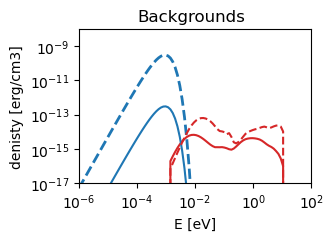

init. AM3 kernels:
AM3 has the following switches (at step: 0)
estimate maximum energies: 0
parse sed components: 1
escape: 1
expansion: 0
adiabatic: 1
synchrotron:
  e+/-: 1  (em..: 1, cool.: 1)
  protons:1  (em..: 1, cool.: 1)
  pions:0  (em..: 1, cool.: 1)
  muons:0  (em..: 1, cool.: 1)
  syn-self-abs.:1
  e+/- quantum-syn.:0
inv. Compton:
  e+/-: 1  (em.. : 1, cool.: 1 (continuous))
  photon loss due to upscattering: 0
  protons:1  (em.. (step approx.): 1, no cooling)
  pions:0  (em.. (step approx.): 1, cont. cool.: 1)
  muons:0  (em.. (step approx.): 1, cont. cool.: 1)
pair prod. (gamma+gamma->e+e)1  (photon loss.: 1, e+/- source (feedback): 1(opt. 14-bin kernel))
'hadronic' processes (below): 1
 Pion decay: 1 Muon decay:1)
proton Bethe-Heitler: 1  (em..: 1, cool.: 1)
proton photo-pion: 1  (em..: 1, cool.: 1, photon loss: 1)
proton p-p: 1  (em..: 1 , cool.: 1)

AM3 params (comoving):
escape_timescale: 1e+06 s
  with fractions: (protons: 1, neutrons: 1, pions: 1, muons: 1, neutrino

'1.61e+15'

In [4]:

os.environ["GAMMAPY_DATA"] = "/Users/xrodrigu/analysis/sin/sin-v/data"
from astropy import units as u
import matplotlib.pyplot as plt
from gammapy.modeling.models import (
    EBLAbsorptionNormSpectralModel,
    Models,
    PowerLawSpectralModel,

    SkyModel,
)
dominguez = EBLAbsorptionNormSpectralModel.read_builtin("dominguez", redshift=0.)


bestfitpars = {}
with open(f"./best_fits.dat", "r") as f:
    results = f.readlines()
with open(f"./best_fits.dat", "r") as f:
    allresults = f.read()


for s in CAT:    
            
    if s not in allresults:
        continue
    solution = [[float(x) for x in r.split()[1:]] for r in results if s in r][0]

    bestfitpars[s] = solution



    mycolors = np.array([np.array([230,159,  0.]),
                     np.array([ 86,180,233.]),
                     np.array([  0,158,115.]),
                     np.array([240,228, 66.]),
                     np.array([  0,114,178.]),
                     np.array([213, 94,  0.]),
                     np.array([201,121,176.])])
mycolors *= 1./255

# ##################
# # LOW STATE
PARAMS_LEP = {}
PARAMS_LEP['0649_3139'] = {'r1' : 16.499169771399618,      
                            'b1' : -1.3601795636247869,
                            'egmax1' : 5.424702447750383,
                            'ealpha1' : 1.8214913065553737,
                            'elum1' : 41.47992893877567,
                            'lor1' : 1.4999999999969613,
                            'egmin1' : 2.7938065131304564
                            }
PARAMS = {'sourcename': '4FGLJ0649.5-3139', 
          'rblob':1.2e+16,
          'magfield':0.1e+00,
          'egammamin':1,
          'egammamax':2.e+05, 
          'eindex':1.5,
          'elum':1.5e+41,
          'lorentz':18.e+00,
          'rdissratio':10, ###
          'pgammamin':1e2,
          'pgammamax':1e6, 
          'pindex':1.0,
          'plum':4e+44*0,
          'z':0.7,
          'disk_lum':2.95e+44 / 2,
          'masquerading':'M'}

source = CAT[PARAMS['sourcename']]

am3.update_energy_grid(1e-9,1e9,1e21) # set Emin to 1e-9 !





def PlanckDistribution(earr, temperature, lum):
    '''
    Thermal Distribution (unnormalized)

    return: E^2dN/dE [a.u.]
    par earr (array): photon energy [eV]
    par temperature [K]
    par lum: total luminosity [erg/s]
    '''
    lgr = earr / temperature / const.k_B.to(u.eV/u.K)
    exparr = np.exp(lgr) - 1
    ednde = earr ** 4 / exparr
    integ = np.trapz(ednde / earr, earr)
    return ednde * lum / integ


def Schwarzschild(m_bh):
    '''Schwarzschild radius [cm]
    
    m_bh: black hole mass [m_solar]
    '''
    rad = (2 * const.G * m_bh * 1.989e30*u.kg 
           / const.c ** 2)
    return rad.to(u.cm)


def DiskTemperature(rad, lumdisk, m_bh, eta=0.08):
    '''Radius-dependent disk temperature [K]
    '''
    sb = const.sigma_sb.to(u.erg/u.s/
                           u.K**4/u.cm**2)
    rsch = Schwarzschild(m_bh)
    
    term1 = 3 * rsch * lumdisk / (16 * np.pi * eta 
                                  * sb * rad ** 3)
    term2 = 1 - (3 * rsch / rad) ** 0.5
    return (term1 * term2) ** 0.25
 

def ShakuraFlux(earr, lumdisk, m_bh, thetaobs=3.0, eta=0.08):
    '''Disk spectral flux in observer's frame [erg/cm2/s]
    
    earr (array): photon energies [eV]
    lumdisk: [erg/s]
    m_bh: black hole mass / m_solar
    thetaobs: angle btw. LOS and disk rotation axis (deg)
    '''
    kB = const.k_B.to(u.eV/u.K)
    c0 = const.c.cgs
    hplanck = const.h.to(u.eV*u.s)
#     dlum = cosmo.luminosity_distance(z).to(u.cm)
    rsch = Schwarzschild(m_bh)
    rin = 3 * rsch
    rout = 300 * rsch
    radarr = np.linspace(rin, rout, 50)
    
    frac = (4 * np.pi) ** 2 * hplanck * np.cos(thetaobs*np.pi/180) / c0 ** 2
    nuarr = earr / hplanck       # convert x-axis to obs frame
    en2d = earr[:,np.newaxis]    # convert x-axis to obs frame
    rad2d = radarr[np.newaxis,:]
    temp2d = DiskTemperature(rad2d,lumdisk,m_bh,eta) # K
    
    integrand = rad2d / (np.exp(en2d/temp2d/kB) - 1)
    integral = np.trapz(integrand, radarr, axis=1)
    Fnu = (nuarr ** 3 * frac * integral).to(u.erg)
    return nuarr * Fnu

def BroadLine(earr, center, width, lum):
    '''
    Broad line spectrum, normalized to `lum` 

    return: E^2dN/dE [a.u.]
    par earr (array): photon energies (eV)
    par center: line energy [eV]
    par width: line width (eV)
    par lum: line luminosity [erg/s]
    '''
    ednde = np.exp(-0.5 
                   * (earr - center) ** 2 
                   / width ** 2
                  )
#     ednde[ednde < 1e-100] = 0.
    integ = np.trapz(ednde/earr, earr)
    ednde *= lum / integ
    return ednde

def get_BLR_density_scaling(R_zone, R_diss, lorentz):
    '''Scaling of the photon density seen in the jet frame 
    with the dissipation radius, according to Eq. 20 of 
    Ghisellini+Tavecchio 0902.0793
    '''

    def scaling_for_large_R_diss(R_diss, R_zone, lorentz):
        beta = (1 - 1. / lorentz ** 2) ** 0.5
        mu1 = (1 + (R_zone / R_diss) ** 2) ** -.5
        mu2 = (1 - (R_zone / R_diss) ** 2) ** .5
        f_mu = (2 * (1 - beta * mu1) ** 3
                - (1 - beta * mu2) ** 3
                - (1 - beta) ** 3)
        return f_mu / 3. / beta

    f0 = 17. / 12
    
    if R_diss <= R_zone:
        scaling = f0
        
    elif R_diss >= 3 * R_zone:
        scaling = scaling_for_large_R_diss(
            R_diss,
            R_zone,
            lorentz)
        
    elif R_zone < R_diss < 3 * R_zone:
        # Power-law interpolation
        f_3R = scaling_for_large_R_diss(
            3 * R_zone, 
            R_zone,
            lorentz
        )
        scaling = 10 **(
            (np.log10(f_3R) - np.log10(f0))
            / (np.log10(3 * R_zone) - np.log10(R_zone))
            * (np.log10(R_diss) - np.log10(R_zone))
        )
        
    return scaling
     
def tangential_angle(R_BLR, R_diss):
    '''Calculate the characteristic angle of the radiaiton,
        which is the tangential angle. This is where the dominant
        contribution comes from because it has the highest doppler
        boost, as well as for geometric reasons.
    '''
    csi = np.arcsin(R_BLR/R_diss)
    return csi

def calc_doppler(lorentz, R_BLR, R_diss):
    '''Calculate relative Doppler factor between blob and BLR.
        The blob has bulk factor `lorentz` and distance to the black hole 
        given by `R_diss` [cm]. The BLR has radius `R_BLR` [cm].
    '''
    if R_diss <= R_BLR:
        return lorentz
         
    csi = tangential_angle(R_BLR, R_diss)
    beta = (1 - 1. / lorentz ** 2) ** 0.5
    doppler = lorentz * (1 - beta * np.cos(csi))
    return doppler

def doppler_factor(theta_obs, Gamma):

    beta = np.sqrt(1 - 1 / Gamma ** 2)
    delta = 1 / (Gamma * (1 - beta * np.cos(theta_obs)))
    return delta

def convert_lum_to_density_in_jet(R_diss, lorentz, R_BLR):
        ''' Convert external field luminosity in the rest frame of the 
        black hole in [erg/s] into energy density in the comoving frame 
        of the jet blob in [GeV / cm^3]. R_BLR can represent the BLR radius
        or the dust torus radius. 

        return: conversion factor [GeV erg^-1 s cm^-3]
        '''      
        if R_diss < 1e-100: R_diss += 1e-100 
        if lorentz < 1e-100: lorentz += 1e-100 
        if R_BLR < 1e-100: R_BLR += 1e-100
            
        doppler_fact = calc_doppler(lorentz, R_BLR, R_diss)
        
        f1 = (lorentz ** 2 
                / (4.
                    * np.pi 
                    * R_BLR ** 2 
                    * const.c.cgs.value)
                * u.erg.to('GeV'))
                
        f2 = get_BLR_density_scaling(R_BLR, R_diss, lorentz)
        factor =  f1 * f2 
        
        return factor

def convert_lum_to_density_in_jet_full(R_diss, lorentz, R_BLR):
        ''' Convert external field luminosity in the rest frame of the 
        black hole in [erg/s] into energy density in the comoving frame 
        of the jet blob in [GeV / cm^3]. R_BLR can represent the BLR radius
        or the dust torus radius. 

        return: conversion factor [GeV erg^-1 s cm^-3]
        '''      
        if R_diss < 1e-100: R_diss += 1e-100 
        if lorentz < 1e-100: lorentz += 1e-100 
        if R_BLR < 1e-100: R_BLR += 1e-100
            
        doppler_fact = calc_doppler(lorentz, R_BLR, R_diss)
        
        f1 = (doppler_fact ** 2 
                / (4.
                    * np.pi 
                    * R_BLR ** 2 
                    * const.c.cgs.value)
                * u.erg.to('GeV'))
                
        f2 = get_BLR_density_scaling(R_BLR, R_diss, lorentz)
        factor =  f1 * f2 
        
        return factor

def convert_torus_lum_to_density_in_jet(R_diss, lorentz, R_torus):
        ''' Convert external field luminosity in the rest frame of the 
        black hole in [erg/s] into energy density in the comoving frame 
        of the jet blob in [GeV / cm^3]. R_BLR can represent the BLR radius
        or the dust torus radius. 

        return: conversion factor [GeV erg^-1 s cm^-3]
        '''      
        if R_diss < 1e-100: R_diss += 1e-100 
        if lorentz < 1e-100: lorentz += 1e-100 
            
        csi = np.arctan(R_torus / R_diss) # i think
        beta = (1 - 1. / lorentz ** 2) ** 0.5
        doppler_fact = lorentz * (1 - beta * np.cos(csi))

        factor = (doppler_fact ** 2 
                / (4.
                    * np.pi 
                    * (R_torus ** 2 + R_diss ** 2) 
                    * const.c.cgs.value)
                * u.erg.to('GeV'))
        
        
        return factor

###################
## TEMPLATES
###################

def get_blue_bump(z, disklum, plot=0,threshold=0):
    
    blue_bump_file ='/Users/xrodrigu/analysis/sin/sin-v/data/templates/BlueBumpTemplNormalised_4py.txt'
    dataTempl_BB = pd.read_csv(blue_bump_file, delimiter="\s+", names=["Frequency", "Flux"],  skiprows=1, header=None)
    dataTempl_BB["FreqObserverframe"] = dataTempl_BB["Frequency"] / (1.+z)

    # Different definition: MAXIMUM
    scaling_factor = disklum / np.max(dataTempl_BB["Flux"]) #  
    dataTempl_BB["Flux5000"] = dataTempl_BB["Flux"] * scaling_factor
    if z <= 0.:
        print("[get_blue_bump]Error: z=0!")
        return
    distance = cosmo.luminosity_distance(z)*kpc*1e5
    nulnuat1p2e15 = 4.*np.pi*distance.value**2*scaling_factor*1.938
    # 1.e15 = 2500 A                                                                                                                                                       
    # 1.938 is the flux value at nu = 1.2e15 in the BlueBumpTemplNormalised_4py.txt file                                                                                   
    # 0.154 is the flux value at nu = 2.41E17 in the BlueBumpTemplNormalised_4py.txt file                                                                                  
    scalingXflux = 10.**((-0.137*np.log10(nulnuat1p2e15)+4.704+1.0)*2.605)/0.154
    ddUVOTTB = dataTempl_BB [dataTempl_BB["Frequency"] < 1.e16]
    ddXTB = dataTempl_BB [dataTempl_BB["Frequency"] > 1.e16]
    x, y = ddUVOTTB["FreqObserverframe"], ddUVOTTB["Flux5000"]
    y[x<threshold] *= 0
    if plot:
        plt.gca().errorbar(x, y, xerr=None, yerr=None, fmt='o', color = '#009900', markersize='1')
    
    return x, y, y * 0


def get_giant_elliptical(z, plot=0, **kwargs):
    label = kwargs['label'] if 'label' in kwargs else None
    
    distance =  cosmo.luminosity_distance(z)*kpc*1e5
    const = 4.*np.pi*distance.value**2
    ge_template_file ='/Users/xrodrigu/analysis/sin/sin-v/data/templates/GiantEllipticalTemplate_4py.txt'
    dataTempl_GE = pd.read_csv(ge_template_file, delimiter="\s+", names=["Frequency", "Luminosity"],  skiprows=1, header=None)
    dataTempl_GE["FreqObserverframe"] = dataTempl_GE["Frequency"] / (1.+z)
    dataTempl_GE["Flux"] = dataTempl_GE["Luminosity"] / const * 1.0
    x, y = dataTempl_GE["FreqObserverframe"],dataTempl_GE["Flux"]
    if plot:
        # plt.gca().errorbar(x, y, xerr=None, yerr=None, fmt='o', color = '#ff33cc', markersize='1', ls ='-')
        plt.loglog(x, y, color = '#ff33cc', ls ='-', label=label)
    return x, y, y * 0

def get_vou_sed(vou_sed_file, plot=0):
    data  = pd.read_csv(vou_sed_file,  delimiter="," , names=["Frequency", "Flux", "Flux_err", "MJD", "MJD_end", "IsDet", "Cat", "Reference"],  skiprows=1, header=None)

    data['xtype'] = data['Frequency']    

    plt.gca().set_xscale('log')
    plt.gca().set_yscale('log')
    plt.gca().tick_params(axis='both', which='both', direction='in', length=5 , labelsize=18, top=True, right=True, labeltop=False, labelright=False)

    dda = data[data["Cat"].str.strip() != 'DEBL']
    debl = data[data["Cat"].str.strip() == 'DEBL']
    deros = data[(data["Cat"].str.strip()  == 'eROSITA-EDR') & (data["IsDet"] != 'UL')]
    dalma = data[data["Cat"].str.strip()   == 'ALMA']
    dneowise = data[data["Cat"].str.strip()   == 'NEOWISE']
    dsmarts = data[data["Cat"].str.strip() == 'SMARTS']
    dnustar = data[data["Cat"].str.strip() == 'NuBlazar']
    dxmm = data[(data["Cat"].str.strip()  == 'XMMSL2') | (data["Cat"].str.strip()  == '4XMM-DR11') | (data["Cat"].str.strip()  == '4XMM-DR13')]
    dswift = data[(data["Cat"].str.strip()  == 'SUFST')]
    dd  = dda[(dda["IsDet"] != 'UL') & (dda["Flux_err"] >= 0.) & ( ( (dda["Frequency"] > 1.4e13) | (dda["Frequency"] < 1.3e13) ) | ( ( (dda["Frequency"] > 1.3e13) & (dda["Frequency"] < 1.4e13) ) & (dda["Flux"] > 1.5e-12) ) ) ]
    dlimit = data[ (data["IsDet"] == 'UL') | (data["Flux_err"] >= data["Flux"]) ]
    x, y, yerr = dd["xtype"], dd["Flux"], dd["Flux_err"]
    
    if plot:
        plt.gca().errorbar(x, y, xerr=None, yerr=yerr, fmt='o',color = '#0066cc', markeredgecolor='black', markersize='5',zorder=8)
    return x, y, yerr


def plot_data_and_templates(sname, z, 
                            bbb_flux,
                            plot_bbbump=True, 
                            plot_giant_elliptical=True, 
                            plot_data=True, **kwargs):
    
    label = kwargs['ge_label'] if 'ge_label' in kwargs else None
    label = kwargs['ge_label'] if 'ge_label' in kwargs else None
    
    if plot_data:
        sed_file = f"/Users/xrodrigu/analysis/sin/sin-v/data/vou_data/sed_sin_{sname}.csv"
        sed_x,sed_y,sed_e = get_vou_sed(sed_file, plot=plot_data)
    
    if plot_giant_elliptical:
        ge_x,ge_y,ge_e = get_giant_elliptical(z, plot=plot_giant_elliptical,label=ge_label)
    if plot_bbbump:
        bb_x,bb_y,bb_e = get_blue_bump(z,bbb_flux, plot=plot_bbbump,label=bb_label)
    
    plt.loglog()

    ymin = min([1e-17, min(sed_y) / 3.])
    ymax = max([1e-11, max(sed_y) * 3.])
    plt.axis([1e7,1e33,ymin,ymax])
    plt.xlabel(r'${\rm Frequency}$ $\nu_{\rm observer~frame}{\rm [Hz]}$', fontsize=20 )
    plt.ylabel(r'$\nu$F$_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]', fontsize=20)

    return sed_x, sed_y, sed_e

PLOT_ALL = False

def inject_and_run(verbose=0):
    #############################################
    ### Define accelerated electron spectrum
    #############################################
    elec_emin =  PARAMS['egammamin'] * (const.m_e * const.c ** 2).to(u.eV).value # eV
    elec_emax =  PARAMS['egammamax'] * (const.m_e * const.c ** 2).to(u.eV).value # eV
    eindex =     PARAMS['eindex']
    elum =       PARAMS['elum'] # erg/s
    R_diss = PARAMS['rdissratio'] * R_BLR
    
    lorentz = PARAMS['lorentz']
    disk_lum = PARAMS['disk_lum']
    
    egrid = am3.get_egrid_lep()
    epowerlaw = (egrid ** (2 - eindex) 
                    * (egrid >= elec_emin)
                    * np.exp(-egrid / elec_emax)
                )
    
    # EIND2 = 3.5
    # epowerlaw = (egrid ** (2 - eindex) 
    #                 * (egrid >= elec_emin)
    #                 * (egrid < elec_emax)
    #                 + (egrid ** (2 - EIND2))
    #                 * (egrid >= elec_emax)
    #                 * (elec_emax ** (EIND2 - eindex)) # ALTERNATIVE, BROKEN POWER-LAW
    #                 * (egrid < 1e13)
    #             )
    
    # plt.loglog(am3.get_egrid_lep(), epowerlaw * am3.get_egrid_lep())
    # plt.show()
    # epowerlaw[epowerlaw < 1e-100] = epowerlaw[epowerlaw < 1e-100] * 0 + 1e-100

    
    # Integrate spectrum in erg/s
    etrapz = np.trapz(epowerlaw / egrid, egrid)
    
    # Normalize it to the desired electron lumiosity
    enormalized = epowerlaw * elum / etrapz # erg/s
    
    # Convert it to an energy density injection rate
    volume = 4/3 * np.pi * (am3.get_escape_timescale() * const.c.cgs.value) ** 3
    enormalized /= volume # erg/cm3/s
    
    # And finally to a particle density injection rate
    enormalized /= egrid * u.eV.to(u.erg) # cm-3.s-1
    
    #############################################
    ### Define accelerated proton spectrum
    #############################################
    
    proton_emin =  PARAMS['pgammamin'] * (const.m_p * const.c ** 2).to(u.eV).value # eV 
    proton_emax =  PARAMS['pgammamax'] * (const.m_p * const.c ** 2).to(u.eV).value # eV
    pindex =     PARAMS['pindex']
    plum =       PARAMS['plum'] # erg/s
    
    pgrid = am3.get_egrid_had()
    ppowerlaw = (pgrid ** (2 - pindex)
                    * (pgrid >= proton_emin)
                    * np.exp(- pgrid / proton_emax)
                )

    # Integrate spectrum in erg/s
    ptrapz = np.trapz(ppowerlaw / pgrid, pgrid)
          
    # Normalize it to the desired proton lumiosity
    pnormalized = ppowerlaw * plum / ptrapz # erg/s
               
    # Convert it to an energy density injection rate
    volume = 4/3 * np.pi * (am3.get_escape_timescale() * const.c.cgs.value) ** 3
    pnormalized /= volume # erg/cm3/s
        
    # And finally to a particle density injection rate
    pnormalized /= pgrid * u.eV.to(u.erg) # cm-3.s-1
    
    
    #############################################
    ### Define external photon spectrum
    #############################################
    
    # Define BLR and torus parameters


    blr_doppler = calc_doppler(lorentz, R_BLR, R_diss)
    torus_doppler = calc_doppler(lorentz,R_TORUS,R_diss)
    
    # AM3 photon grid
    egrid_jetframe = am3.get_egrid_photons() * u.eV 
    
    # Set up array for adding up external fields
    external_photons = np.zeros(egrid_jetframe.size) * u.GeV / u.cm**3
    
    # Scattered thermal disk emission
    templ_diskx, templ_disky = np.loadtxt('/Users/xrodrigu/analysis/sin/sin-v/data/disk_continuum_template.dat', unpack=1, delimiter=',')
    disky = 10 ** np.interp(np.log10(egrid_jetframe.value / blr_doppler),
                            np.log10(templ_diskx),
                            np.log10(templ_disky)) * (disk_lum / 1e45) * u.erg / u.s
    # Broad line emission
    hybl = BroadLine(egrid_jetframe / blr_doppler, 
                        10.2*u.eV, 10.2*u.eV/20, 
                        disk_lum * u.erg / u.s * BLR_COVERING) # H Ly alpha [erg/s]
    hebl = BroadLine(egrid_jetframe / blr_doppler, 
                        40.8*u.eV, 40.8*u.eV/20, 
                        disk_lum * u.erg / u.s * BLR_COVERING * 0.5) # He Ly alpha [erg/s]
    # Convert BLR components to jet frame

    blr_to_jet = convert_lum_to_density_in_jet(R_diss,lorentz,R_BLR) # erg/s -> GeV/cm3 
    blr_to_jet *= u.GeV / u.cm ** 3 / (u.erg / u.s) # give it units

    external_photons += (disky * 0.01 +
                         hybl+  
                         hebl
                         ) * blr_to_jet #* 1e-10 
    
    # Dust torus
    torusy = PlanckDistribution(egrid_jetframe / torus_doppler,
                                torus_temperature,
                                disk_lum * u.erg / u.s * TORUS_COVERING) # [erg/s]  
    # Convert torus emission to jet frame
    tor_to_jet = convert_torus_lum_to_density_in_jet(R_diss,lorentz,R_TORUS) # erg/s -> GeV/cm3 
    tor_to_jet *= u.GeV / u.cm**3 / (u.erg/u.s)  # give it units

    # Add torus to BLR components 
    external_photons += torusy * tor_to_jet 
    
    # Convert summed up components from energy density to photon density in jet frame
    external_photonspectrum = (external_photons / egrid_jetframe).to(u.cm ** -3).value # cm-3
    
    # Convert photon density to density ijnjection rate
    external_photonspectrum /= am3.get_escape_timescale() # cm-3.s-1


    #######################
    ### INJECT PARTICLES
    #######################
    
    # Reset all particle arrays to zero
    am3.clear_particle_densities()
    am3.evolve_step()
    
    # Inject cosmic rays and external photons in the simulation
    if verbose: print("Injecting electrons and protons...")
    
    am3.set_injection_rate_electrons(enormalized)
    am3.set_injection_rate_protons(pnormalized)

    if verbose: print("Injecting external photons...")
    am3.set_injection_rate_photons(external_photonspectrum)
    am3.set_current_densities_photons(external_photonspectrum * am3.get_escape_timescale())

    #######################
    ### RUN SIMULATION
    #######################
    
    if verbose: print("Evolving solver to the steady state...")

    if PLOT_ALL: ftemp = plt.figure()

    escaped = {'e' : am3.get_egrid_lep() * 0,
                'p' : am3.get_egrid_had() * 0,
                'n' : am3.get_egrid_had() * 0,
                'g' : am3.get_egrid_photons() * 0,
                'g_had' : am3.get_egrid_photons() * 0,
                'g_lep' : am3.get_egrid_photons() * 0,
                }

    esc_frac_electrons = np.minimum(am3.get_egrid_lep()*0+1., am3.get_escape_timescale() / am3.get_t_pair_escape())
    esc_frac_protons = np.minimum(am3.get_egrid_had()*0+1., am3.get_escape_timescale() / am3.get_t_proton_escape())

    time = 0.
    # INJ_ON = 1
    while time < SIMTIME * am3.get_escape_timescale():  # Run up to 3x the light-crossing time a

        # if INJ_ON:
        #     if time > am3.get_escape_timescale():
        #         am3.set_injection_rate_electrons(am3.get_egrid_lep()*0)
        #         am3.set_injection_rate_protons(am3.get_egrid_had()*0)
        #         INJ_ON = 0
                
        am3.evolve_step()                  # Evolve solver
        time += am3.get_solver_time_step() # Count time

        # escaped['e']     += am3.get_egrid_lep() * u.eV.to(u.erg) * am3.get_electrons() * 4 * np.pi * (am3.get_escape_timescale()*const.c.cgs.value) ** 2 * const.c.cgs.value * am3.get_solver_time_step() * esc_frac_electrons
        # escaped['p']     += am3.get_egrid_had() * u.eV.to(u.erg) * am3.get_protons() * 4 * np.pi * (am3.get_escape_timescale()*const.c.cgs.value) ** 2 * const.c.cgs.value * am3.get_solver_time_step() * esc_frac_protons
        # escaped['n']     += am3.get_egrid_had() * u.eV.to(u.erg) * am3.get_neutrons() * 4 * np.pi * (am3.get_escape_timescale()*const.c.cgs.value) ** 2 * const.c.cgs.value * am3.get_solver_time_step()
        # escaped['g']     += am3.get_egrid_photons() * u.eV.to(u.erg) * am3.get_photons_except_injected() * 4 * np.pi * (am3.get_escape_timescale()*const.c.cgs.value) ** 2 * const.c.cgs.value * am3.get_solver_time_step() 
        # escaped['g_lep'] += am3.get_egrid_photons() * u.eV.to(u.erg) * am3.get_photons_injected_electrons_syn_compton() * 4 * np.pi * (am3.get_escape_timescale()*const.c.cgs.value) ** 2 * const.c.cgs.value * am3.get_solver_time_step() 
        # escaped['g_had'] += am3.get_egrid_photons() * u.eV.to(u.erg) * (am3.get_photons_annihilation_pairs_syn_compton() +
        #                     am3.get_photons_photo_pion_pairs_syn_compton() +
        #                     am3.get_photons_pi0_decay() +
        #                     am3.get_photons_protons_syn_compton()) * 4 * np.pi * (am3.get_escape_timescale()*const.c.cgs.value) ** 2 * const.c.cgs.value * am3.get_solver_time_step()         

        if PLOT_ALL:
            plt.loglog(am3.get_egrid_lep(), am3.get_electrons() * am3.get_egrid_lep())
    
    if PLOT_ALL: 
        plt.axis([1e5,1e10,1e-50,1e-40])
        plt.show()
    return escaped

def get_etotal_from_number(n, alpha, emin, emax):
    
    egrid = np.logspace(np.log10(emin), # eV
                        np.log10(emax),
                        100)
    epowerlaw = (egrid ** (2 - alpha) 
                    * (egrid >= emin)
                    * np.exp(- egrid / emax)
                )
    ntrapz = np.trapz(epowerlaw / egrid ** 2, egrid)    
    normalized = epowerlaw * n / ntrapz 
    etotal = np.trapz(epowerlaw / egrid, egrid) * u.eV.to(u.erg)
    
    return etotal # erg


################################################################################
#########   ##########   ##########   EBL   ##########   ##########   ##########     
################################################################################

sys.path.append('/Users/xrodrigu/analysis/sin/sin-v/data/CRPropa3-data/')
import photonField

def get_ebl(e,z,model='Sal'):
    '''
    Energy in eV; 
    Return spectrum in cm-3
    '''
    if z > 3:
        z = 3
    
    dom = photonField.EBL_Saldana21()
    if model == 'Dom':
        dom = photonField.EBL_Dominguez11()
    elif model == 'Fra':
        dom = photonField.EBL_Franceschini08()
    elif model == 'Gil':
        dom = photonField.EBL_Gilmore12()
    elif model == 'Ste':
        dom = photonField.EBL_Stecker16()
    elif model != 'Sal':
        print(f"[get_ebl]WARNING: EBL model {model} not recognized. Using Saldana-Lopez 2021.")

    spec = dom.getDensity(e * u.eV.to(u.J),z=z) * (1./u.m**3/u.J).to(1./u.cm**3/u.eV).value * (1 + z) ** 3
    return spec * e

def get_cmb(e, z):
    '''
    Energy in eV; 
    Return spectrum in cm-3ƒ
    '''
    cmb = photonField.CMB()
    spec = cmb.getDensity(e * u.eV.to(u.J),0.0) * (1./u.m**3/u.J).to(1./u.cm**3/u.eV, z).value * (1 + z) ** 3
    return spec * e

_ =plt.figure(figsize=(3,2))

ex = np.logspace(-6,2,100)

plt.loglog(ex, ex * u.eV.to(u.erg) * get_ebl(ex, 0.0),c='tab:red')
plt.loglog(ex, ex * u.eV.to(u.erg) * get_cmb(ex, 0.0), c='tab:blue')

plt.loglog(ex, ex * u.eV.to(u.erg) * get_cmb(ex, 9.0), ls='--', c='tab:blue', lw=2)

plt.loglog(ex, ex * u.eV.to(u.erg) * get_ebl(ex, 9.0), ls='--',c='tab:red')

plt.axis([1e-6,1e2,1e-17,1e-8])
plt.suptitle("Backgrounds")
plt.xlabel("E [eV]")
plt.ylabel("denisty [erg/cm3]")
plt.show()

# def create_interpolated_EBLmodel(ebl_filename):
#     """ Creates an interpolated version of the ebl model.
#         Based on the data file found in CRPropa3-data/tables/EBL_Gilmore_2012/eblflux_fixed.dat
#     """
#         import astropy.units as u
#         from astropy.constants import hbar, c
#         from scipy.interpolate import RectBivariateSpline

#         zlist = np.array([0.0, 0.015, 0.025, 0.044, 0.05, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0])
#         eblg = np.loadtxt(ebl_filename)

#         elist = (2*np.pi*hbar*c / (eblg[:, 0] * 1e-10 * u.m)).to('eV').value[::-1] # energies 
#         density_grid = (4*np.pi / c * eblg[:, 0][:, np.newaxis] * eblg[:, 1:] * u.erg / u.s / u.cm**2 / (2*np.pi*hbar*c / (eblg[:, 0][:, np.newaxis] * 1e-10 * u.m))**2).to('1/(eV*m^3)').value[::-1, :]

#         eblg_interp = RectBivariateSpline(elist, zlist, density_grid / (1 + zlist[np.newaxis, :])**3, s=0)
        
#         return eblg_interp

def propagate(egrid, emitted_spectrum, z_source=.3, igmf_gauss=1e-16, include_cascade=True, delta_t=0.01,local_distance_pc=0):
    # return [egrid, emitted_spectrum, emitted_spectrum, emitted_spectrum] 
    from astropy.cosmology import z_at_value
    
    saved_props = [am3.get_escape_timescale()*1.0, am3.get_mag_field() * 1.0]
    am3.clear_particle_densities()
    am3.evolve_step()
    am3.clear_particle_densities()

    # unirad = 46.5e9 * u.lightyear.to(u.cm)

    proprad = cosmo.lookback_distance(z_source).cgs.value # cm
    proptime = cosmo.lookback_time(z_source)
    
    # For local sources, use distance
    if z_source == 0:
        proprad = local_distance_pc * u.pc.to(u.cm)
        proptime = proprad / const.c.cgs.value * u.s

    print(f"Propagating photons: {proptime:.1e} ({proprad*u.cm.to(u.Mpc):.1e} Mpc)")

    am3.set_escape_timescale(proptime.to(u.s).value)
    am3.set_solver_time_step(delta_t * am3.get_escape_timescale())

    am3.set_powerlaw_injection_parameters_electrons(1e10, 0.0, 100, 100, 1e6, 2, 2, 1)
    am3.set_powerlaw_injection_parameters_protons(1e10, 0.0, 100, 100, 1e6, 2, 2, 1)
    am3.set_injection_rate_photons(am3.get_egrid_photons() * 0)
    
    am3.set_mag_field(igmf_gauss)

    am3.set_escape_fraction_pairs(1. + 1e10 * (not include_cascade))

    time = am3.get_solver_time_step()
    counter = 0
    last_z = z_source
    ecut = 1e1
    totalzfac = 1.
    while time < am3.get_escape_timescale()*1.00001:
        
        lbtime = proptime - (time * u.s.to(u.Gyr) * u.Gyr)
        z = z_at_value(cosmo.lookback_time, lbtime, zmin=-1e-2,zmax=z_source*1.1).value
        zfac = (1+z)/(1+last_z)
        totalzfac *= zfac
        zround = round(z, 1)
        # zlist = np.array([0.0, 0.015, 0.025, 0.044, 0.05, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0])
        # zround = zlist[np.abs(zlist - z).argmin()]
        bckg = get_ebl(am3.get_egrid_photons(), zround, model='Sal') + get_cmb(am3.get_egrid_photons(), zround) # approximation (check posibilities)

        source_emission = np.interp(am3.get_egrid_photons(), am3.get_egrid_photons() * zfac, am3.get_photons()) / (zfac) ** 0.9
        if counter == 0:
            source_emission = np.interp(am3.get_egrid_photons(), 
                             egrid,
                             emitted_spectrum / const.c.cgs.value)    # erg/cm2/s -> erg/cm-3
        
            source_emission /= (am3.get_egrid_photons()*u.eV.to(u.erg)) # erg/cm3   -> cm-3
        
        combined_spec = bckg * (am3.get_egrid_photons() < ecut) + source_emission * (am3.get_egrid_photons() >= ecut)
        
        am3.set_current_densities_photons(combined_spec)
        
        am3.evolve_step()                  # Evolve solver

        counter += 1
        time += am3.get_solver_time_step() # Count time
        last_z = z

        
    timescaling = np.e

    pointsource = (source_emission * (am3.get_egrid_photons() >= ecut) * am3.get_egrid_photons() * u.eV.to(u.erg) * const.c.cgs.value * timescaling +
                    np.interp(am3.get_egrid_photons(), egrid / (1+z_source), emitted_spectrum) * (am3.get_egrid_photons() < ecut)
                   )
    eblcascades = am3.get_photons_except_injected()*timescaling * am3.get_egrid_photons() * u.eV.to(u.erg) * const.c.cgs.value 
    pairs = am3.get_pairs()*timescaling * am3.get_egrid_lep() * u.eV.to(u.erg) * const.c.cgs.value 

    am3.clear_particle_densities()
    # am3.set_mag_field(saved_props[1])
    # am3.set_escape_timescale(saved_props[0])
    # am3.set_escape_fraction_pairs(1.)
    # am3.set_solver_time_step(0.05 * am3.get_escape_timescale())
    am3.evolve_step()

    return [am3.get_egrid_photons() * 1.0, pointsource, eblcascades, pairs]






def bin_data(data_x, data_y, data_err, is_uplim, eps=0.4):
    
    x = np.log10(data_x[~is_uplim])
    bins = np.arange(np.min(x) - eps/2, np.max(x) + eps, eps)
    dig = np.digitize(x,bins)-1

    
    binned_x = np.array([np.mean(np.log10(data_x[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                         for i in set(dig)])
    binned_y = np.array([np.mean(np.log10(data_y[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                         for i in set(dig)])
    binned_e = np.log10(np.array([np.max(((data_err[~is_uplim]+data_y[~is_uplim])/data_y[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                                  for i in set(dig)]))
    binned_spread = np.array([np.ptp(np.log10(data_y[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                              for i in set(dig)])
    binned_spread *=0.5
    binned_spread = np.maximum(np.full(binned_spread.size,0.1), binned_spread)
    binned_err = np.maximum(binned_spread,binned_e)

    errrange = is_uplim * (data_x < 1e-3)
    binned_x = np.concatenate([binned_x,np.log10(data_x[errrange])])
    binned_y = np.concatenate([binned_y,np.log10(data_y[errrange])])
    binned_err = np.concatenate([binned_err,np.log10((data_err[errrange]+data_y[errrange])/data_y[errrange])])
    
    binned_isuplim = np.full(binned_err.size, False)
    binned_isuplim[binned_e.size:] += True
    
    srt = np.argsort(binned_x[np.isfinite(binned_x)])
    return binned_x[srt], binned_y[srt], binned_err[srt], binned_isuplim[srt]
    
def calc_chi2(xdata, ydata, yerrs, isuplim, xmod, ymod, npars=0,verb=0):
    """Calculate reduced chi2 values (lin and log) between data and model.
    """
    yerrs_nonzero = yerrs.copy()
    yerrs_nonzero[yerrs==0] = ydata[yerrs == 0] * .2
    
    yerrs_nonzero[yerrs<ydata*0.05] = ydata[yerrs<ydata*0.05] * .2
    
    yint = np.interp(xdata, 
                      xmod, 
                       ymod)
    roi = np.logical_not(isuplim * (yint <= ydata))
    chi2arr_lin = roi * (         ydata  -          yint ) ** 2 /          yerrs_nonzero  ** 2
    chi2arr_log = roi * (np.log10(ydata) - np.log10(yint)) ** 2 / np.log10(yerrs_nonzero) ** 2
    
    chi2arr_lin[np.isinf(chi2arr_lin)] = 1e3
    chi2arr_log[np.isinf(chi2arr_log)] = 1e3
    
    chi2arr_lin[np.isnan(chi2arr_lin)] = 1e3
    chi2arr_log[np.isnan(chi2arr_log)] = 1e3

    chi2_lin = np.nansum(chi2arr_lin) / (np.sum(roi) - npars)
    chi2_log = np.nansum(chi2arr_log) / (np.sum(roi) - npars)

    if verb and npars >= np.sum(roi):
        print("[calc_chi2]Warning: invalid chi2 test (#parameters >= #data points)")

    
    # ### DEBUG - PLOT
    # print(chi2arr_lin)
    # plt.plot(xmod, ymod)
    # plt.scatter(xdata[~isuplim], ydata[~isuplim],marker='.',color='k')
    # plt.scatter(xdata[isuplim], ydata[isuplim],marker='v',color='gray')
    # plt.axis([-7,15,-17,-9])
    # plt.show()
    # ###

    
    return chi2_lin, chi2_log



def cost_function(r,b,egmax,ealpha,elum,lor,rdr,plum,pgmax,pind=1.0,real_chi2=False, pgmin=2.):
    for par in [r,b,egmax,ealpha,elum,lor,rdr,plum,pgmax,pind]:
        if np.isnan(par):
            return 1e3,1e3,1e3
    # with open("hadscan/tmp.dat", "a") as f:
    #     f.write(f"{r:.2f} {b:.2f} {egmax:.2f} {ealpha:.2f} {elum:.2f} {lor:.2f} {egmin:.2f}\n")  

    peakmin, peakmax = source['thermal_and_syn_fits']['synpeak']
    peakmin, peakmax = peakmin / ev_to_hz , peakmax / ev_to_hz
    fluxmin, fluxmax = source['thermal_and_syn_fits']['synflux']
    
    eblx, ebly = source['ebl_tau']
    gex, gey = source['thermal_and_syn_fits']['host'][0]/ev_to_hz, source['thermal_and_syn_fits']['host'][1] 

    PARAMS['rblob'] = 10 ** r
    PARAMS['magfield'] = 10 ** b
    PARAMS['egammamax'] = 10 ** egmax
    PARAMS['egammamin'] = GAMMAMIN(10 ** lor)
    PARAMS['eindex'] = ealpha
    PARAMS['elum'] = 10 ** elum
    PARAMS['lorentz'] = 10 ** lor

    PARAMS['rdissratio'] = rdr
    PARAMS['pindex'] = pind        
    PARAMS['plum'] = 10 ** plum
    PARAMS['pgammamax'] = 10 ** pgmax
    PARAMS['pgammamin'] = 10 ** pgmin

    am3.set_mag_field(PARAMS['magfield'])
    am3.set_escape_timescale(PARAMS['rblob'] / const.c.cgs.value) # 4.62e16 cm == Size of the region  
    am3.set_expansion_timescale(PARAMS['rblob']  / const.c.cgs.value) # CHECK!! * PARAMS['lorentz']...
    am3.set_solver_time_step(TIMESTEP * am3.get_escape_timescale())
    # am3.set_escape_fraction_pairs(1.0)
    am3.set_t_pair_escape(calc_t_escape_stoch(am3.get_egrid_lep(), PARAMS['magfield'], PARAMS['rblob'], PARAMS['rblob'], ACC_ALPHA))#am3.get_egrid_lep()*0 + const.c.cgs.value / PARAMS['rblob'] / 10.)#
    am3.set_t_proton_escape(calc_t_escape_stoch(am3.get_egrid_had(), PARAMS['magfield'], PARAMS['rblob'], PARAMS['rblob'], ACC_ALPHA))#am3.get_egrid_lep()*0 + const.c.cgs.value / PARAMS['rblob'] / 10.)#
    am3.set_t_pion_escape(calc_t_escape_stoch(am3.get_egrid_had(), PARAMS['magfield'], PARAMS['rblob'], PARAMS['rblob'], ACC_ALPHA))#am3.get_egrid_lep()*0 + const.c.cgs.value / PARAMS['rblob'] / 10.)#
    am3.set_t_muon_escape(calc_t_escape_stoch(am3.get_egrid_had(), PARAMS['magfield'], PARAMS['rblob'], PARAMS['rblob'], ACC_ALPHA))#am3.get_egrid_lep()*0 + const.c.cgs.value / PARAMS['rblob'] / 10.)#
    

    
    density_to_lum = 4 * np.pi * PARAMS['rblob'] ** 2 * const.c.cgs.value
    # spectrum_conversion = density_to_lum * PARAMS['lorentz'] ** 4 / (4 * np.pi * (cosmo.luminosity_distance(PARAMS['z']).cgs.value) ** 2)
    
    escaped = inject_and_run()

    # egrid_pho = am3.get_egrid_photons()
    # egrid_pho_obs = egrid_pho / (1+PARAMS['z']) * PARAMS['lorentz']

    # atten = np.interp(egrid_pho_obs, eblx, ebly)
    # farr = (am3.get_photons_except_injected() *  egrid_pho * u.eV.to(u.erg) * spectrum_conversion * atten).value
    
    # if not np.any(farr):
    #     return 1e3, 1e3, 1e3

    # try:
    #     isyn = argrelextrema(farr, np.greater)[0][0]
    # except:
    #     # print("EXTREMA NOT FOUND FOR ", r,b,egmax,ealpha,elum,lor)
    #     return 1.5e3, 1.5e3
        
    # syn_lum = farr[isyn]
    # syn_peak = egrid_pho_obs[isyn]

    # factor = 1
        
    # ge_interp = 10 ** np.interp(np.log10(egrid_pho_obs),
                            # np.log10(gex),
                            # np.log10(gey),left=-1000,right=-1000)

    # totals = farr + ge_interp

    # if not real_chi2:
    #     chi2 = calc_chi2(binned_x, binned_y, binned_err, binned_isuplim, 
    #                      np.log10(egrid_pho_obs), np.log10(totals), npars=7)[0] # lin
    #     fitness = chi2 * factor
    
    #     gamma_roi = binned_x > 5.
    #     gamma_chi2 = calc_chi2(binned_x[gamma_roi], binned_y[gamma_roi], binned_err[gamma_roi], np.full(np.sum(gamma_roi),1), 
    #                            np.log10(egrid_pho_obs), np.log10(totals), npars=0)[0]
        
    #     synch_roi = binned_x < 5.
    #     synch_chi2 = calc_chi2(binned_x[synch_roi], binned_y[synch_roi], binned_err[synch_roi], binned_isuplim[synch_roi], 
    #                            np.log10(egrid_pho_obs), np.log10(totals), npars=0)[0]
    
        
    #     return fitness, gamma_chi2, synch_chi2

    # else:
    #     chi2 = calc_chi2(data_x, data_y, (data_errlo + data_errup) /2., is_uplim, 
    #                      egrid_pho_obs, totals, npars=9)[0] # lin
    return escaped

def get_pars(i,f):
    return np.array([bestfitpars[s][i] for s in bestfitpars if f(s)])

def make_pearson_str(r,p):
        if p < 0.001:
                pearsonstr = rf"$(p<0.001)$" #rf"$r={{{r:.1f}}}, p<0.001$"
        elif p < 0.01:
                pearsonstr = rf"$(p={{{p:.3f}}})$" #rf"$r={{{r:.1f}}}, p={{{p:.3f}}}$"
        elif p < 0.1:
                pearsonstr = rf"$(p={{{p:.2f}}})$" #rf"$r={{{r:.1f}}}, p={{{p:.2f}}}$"
        else:
                pearsonstr = rf"$(p={{{p:.1f}}})$" #rf"$r={{{r:.1f}}}, p={{{p:.1f}}}$"
        return pearsonstr


def eddington_lum(m_bh):
    '''[erg/s]. M_BH must be given in solar mass units.
    '''
    return 1.26e38 * m_bh








# Manually define max proton and electron energy
am3.set_estimate_max_energies(0)

HADRONIC = 1
ANNIH = 1
PARSE = 1

# Turn on for keeping track of the different SED components, for plotting purposes;
# turn off for efficiency.
am3.set_process_parse_sed(PARSE)

# Hadronic processes on
am3.set_process_hadronic(HADRONIC)

# Keep track of positrons and electrons separately
am3.set_process_merge_positrons_into_electrons(0)

# Escape (see documantation)
am3.set_process_escape(1)

# Expansion of radiation zone (see documantation)
am3.set_process_expansion(0)
am3.set_process_adiabatic_cooling(1)

# Electron synchrotron and synchrotron self-absorption
am3.set_process_electron_syn(1)
am3.set_process_ssa(1)

# Proton synchrotron - subdominant in this case, but may be relevant for B>~10 G
am3.set_process_proton_syn(HADRONIC)

# Quantum synchrotron off by default.
# In AGN simulations this effect can typically be neglected, so turn off for efficiency
am3.set_process_quantum_syn(0)

# Inverse Compton by electrons and protons 
am3.set_process_electron_compton(1)
am3.set_process_proton_compton(1)

# Direct Compton turned off by default
am3.set_process_compton_photon_energy_loss(0)

# Synchrotron and inverse Compton by muons and pions - off by default.
# In AGN simulations this effect can typically be neglected, so turn off for efficiency
am3.set_process_muon_syn(0)
am3.set_process_pion_syn(0)
am3.set_process_muon_compton(0)
am3.set_process_pion_compton(0)

# Secondary particle decay
am3.set_process_pion_decay(HADRONIC)
am3.set_process_muon_decay(HADRONIC)

# Photon annihilation (gamma gamma -> e- e+)
am3.set_process_annihilation(ANNIH)
am3.set_optimize_annihilation_pair_emission(ANNIH) # optimization

# Bethe-Heitler pair production (p gamma -> p e+ e-)
am3.set_process_bethe_heitler(HADRONIC)
am3.set_optimize_bethe_heitler_outgoing_pairs_grid(1)
am3.set_optimize_bethe_heitler_incoming_protons_min(1e12)
am3.set_optimize_bethe_heitler_target_photon_max(1e6)

# Photo-pion production (nucleon gamma -> nucleon pion)
am3.set_process_photopion(HADRONIC)
am3.set_optimize_photopion_target_photon_grid(1)
am3.set_optimize_photopion_target_photon_max(1e6)

# Initialize the kernels with the above switches
am3.init_kernels()











##########################################
##########################################
##########################################







def calc_t_syn_loss(e_eV, b_gauss):
    return 1. / e_eV / b_gauss ** 2 * 4e14

def larmor(E,magfield):
    '''Larmor radius [cm]
       par E [eV]
       par magfield [Gauss]
    '''
    return (E * u.eV.to(u.erg) /(4.8e-10 * magfield))

def maglum(magfield, r):
    return 1./4 * magfield ** 2 * r ** 2 * const.c.cgs.value


def magnetization(magfield, part_per_sec, L, rblob):
    '''part_per_sec == total particles / second
    '''
    proton_mass = (const.m_p * const.c**2).cgs.value
    kinetic_density = part_per_sec * proton_mass / (4 * np.pi * rblob ** 2 * 3e10)

    cr_density = L / (4 * np.pi * rblob ** 2 * 3e10)
    
    total_energy_density = kinetic_density + cr_density 
    return magfield ** 2 / (4 * np.pi * total_energy_density)

def schwarzschild(m_bh):
    return (2 * const.G * m_bh * 2e30 * u.kg / const.c**2).cgs.value

def calc_sigma(magfield, number_density):
    return magfield ** 2 / (4 * np.pi * number_density * const.m_p.cgs.value * const.c.cgs.value ** 2)

def magnetic_field(magnetization, part_per_sec, L, rblob):
    '''Ntotal == total particles / second 
    '''
    proton_mass = (const.m_p * const.c**2).cgs.value
    kinetic_density = part_per_sec * proton_mass / (4 * np.pi * rblob ** 2 * 3e10)

    cr_density = L / (4 * np.pi * rblob ** 2 * 3e10)
    
    total_energy_density = kinetic_density + cr_density
    return (magnetization  * 4 * np.pi * total_energy_density) ** 0.5

def alfven(magfield, number_density):
    '''Alfven speed [cm/s]. Parameters in cgs
    '''
    # return magfield / (4 * np.pi * number_density * const.m_p.cgs.value) ** 0.5
    sigma = calc_sigma(magfield, number_density)
    return const.c.cgs.value * (sigma / (1 + sigma)) ** 0.5

def tau_stoch(E,magfield,coherence_scale,eta=10.,alpha=0.3): # eta == strength of turbulence (B^2/dB^2)
    rg = larmor(E,magfield)
    return eta * coherence_scale * (rg / coherence_scale) ** (alpha) / const.c.cgs.value

def calc_t_escape_stoch(E, magfield, r, coherence_scale, alpha=0.3):
    t_esc = r * np.maximum(1.0, r / (const.c.cgs.value * tau_stoch(E, magfield, coherence_scale, eta=1.,alpha=alpha))) / const.c.cgs.value
    return t_esc


def calc_accel(e_eV, eta, magfield, stoch=False, coherence_scale=0, number_density=0, alpha=0.3):
    if not stoch:
        return eta * (e_eV / 4.8e-10 / (magfield) / const.c.cgs.value**2)
    tau = tau_stoch(e_eV,magfield,coherence_scale,eta,alpha)
    alf = alfven(magfield, number_density)
    return 3 / (4-alpha) * (const.c.cgs.value / alf) ** 2 * tau

def get_rblob(rdiss, lorentz):
    return rdiss * np.sin(1./lorentz)

def get_imax(part, eta, magfield, rblob, cool=True, esc=True, include_compton=True, secondorder=0, number_density=0, alpha=0.3):

    if part == 'e':
        cooling = 1e100
        if cool:
           if not include_compton:
               cooling = calc_t_syn_loss(am3.get_egrid_lep(), magfield)
           else:
               cooling = 1/(1/calc_t_syn_loss(am3.get_egrid_lep(), magfield) + 1/am3.get_t_pair_compton())
        escape = 1e100
        if esc == 'adv':
            escape = rblob/3e10
        if esc:
            escape = calc_t_escape_stoch(am3.get_egrid_lep(), magfield, rblob, rblob)
        acceler = calc_accel(am3.get_egrid_lep(), eta, magfield, secondorder, rblob, number_density, alpha)

    elif part == 'p':
        cooling = 1/(1/am3.get_t_proton_bethe_heitler() + 1/am3.get_t_proton_photopion() + 1/am3.get_t_proton_syn()) if cool else 1e100
        escape = 1e100
        if esc == 'adv':
            escape = rblob/3e10
        if esc:
            escape = calc_t_escape_stoch(am3.get_egrid_had(), magfield, rblob, rblob)
        acceler = calc_accel(am3.get_egrid_had(), eta, magfield, secondorder, rblob, number_density, alpha)

        # if rblob > 0.9 * u.pc.to(u.cm) and rblob < 1.1 * u.pc.to(u.cm):
        #     f=plt.figure()
        #     plt.loglog(am3.get_egrid_had(), cooling * 3e10 * u.cm.to(u.pc), c='red')
        #     plt.loglog(am3.get_egrid_had(), am3.get_egrid_had()*0+rblob * u.cm.to(u.pc), c='k')
        #     plt.loglog(am3.get_egrid_had(), acceler * 3e10 * u.cm.to(u.pc), c='green')
        #     plt.show()
    else:
        print("[get_imax]Error: particle type not given")
        return

    if not np.any(acceler > escape):
        imax_esc = am3.get_egrid_had().size - 1 if part == 'p' else am3.get_egrid_lep().size - 1
    else:
        imax_esc = np.where(acceler > escape)[0][0]
        
    if not np.any(acceler > cooling):
        imax_cool = am3.get_egrid_had().size - 1 if part == 'p' else am3.get_egrid_lep().size - 1
    else:
        imax_cool = np.where(acceler > cooling)[0][0]

    res = np.min([imax_esc, imax_cool])

    if part == 'e':
        print(f"eemax::: {am3.get_egrid_lep()[res]:.2e} eV")
    return res

def get_b_eq(l_e, l_p, r_b):
    
    u_e = l_e  / (4 * np.pi * r_b ** 2 * const.c.cgs.value)
    u_p = l_p  / (4 * np.pi * r_b ** 2 * const.c.cgs.value)
    b_eq = (8 * np.pi * (u_e + u_p)) ** 0.5

    return b_eq




# def magfield(sigma, N, lum, rblob):
#     '''N == particles/second
#     '''
#     cold = N / part * (const.m_p * const.c**2).cgs.value / (4 * np.pi * rblob ** 2 * 3e10)
#     b2 = 4 * np.pi * sigma * density
#     return b2 ** 0.5



def get_n_total(ind, emin, emax, lum):
    egrid = np.logspace(np.log10(emin), 
                        np.log10(emax)+2,
                        100)
    plaw = (egrid ** - ind
                    * np.exp(- egrid / emax)
                )
    lumtrapz = np.trapz(plaw * egrid, egrid) * u.eV.to(u.erg)
    normalized = plaw * lum / lumtrapz 
    ntotal = np.trapz(normalized, egrid)
    return ntotal


def get_etotal_from_number(n, ind, emin, emax):
    
    egrid = np.logspace(np.log10(emin), 
                        np.log10(emax)+2,
                        100)
    plaw = (egrid ** - ind
                    * np.exp(- egrid / emax)
                )
    ntrapz = np.trapz(plaw, egrid)    
    normalized = plaw * n / ntrapz
    etotal = np.trapz(normalized * egrid, egrid) * u.eV.to(u.erg)
    
    return etotal # erg


# n_derived = get_n_total(pind2, 10**lor2 * m_p_ev, m_p_ev*10**pgmax1, 10**plum1)
# l_derived = get_etotal_from_number(n_derived, pind2, 10**lor2 * m_p_ev, 10**pgmax1 * m_p_ev)
# l_derived_2 = get_etotal_from_number(n_derived, pind2, 10**lor2 * m_p_ev, 10**pgmax2 * m_p_ev)
# n_derived_back = get_n_total(pind2, 10**lor2 * m_p_ev, 10**pgmax2 * m_p_ev, l_derived_2)

# print(f"{np.log10(n_derived):.2f}  {plum1} {np.log10(l_derived):.2f} {np.log10(l_derived_2*(10**lor2)**2/2):.2f} {eddington_lum(CAT[s]['M_BH'])}")









# peakmin, peakmax = source['thermal_and_syn_fits']['synpeak']
# peakmin, peakmax = peakmin / ev_to_hz , peakmax / ev_to_hz
# fluxmin, fluxmax = source['thermal_and_syn_fits']['synflux']    
# eblx, ebly = source['ebl_tau']
# gex = CAT[s]['thermal_and_syn_fits']['host'][0] * 1
# gey = CAT[s]['thermal_and_syn_fits']['host'][1] * 1

# data_x = source['data2311'][0] * 1
# data_y = source['data2311'][1] * 1
# data_errlo = source['data2311'][2] * 1
# data_errup = source['data2311'][3] * 1
# detections = source['data2311'][4]
# is_uplim = (~detections) # + (data_x < (300e9)) # Now, use radio
# data_x /= ev_to_hz
# data_err = np.maximum(data_errlo,data_errup)
# binned_x, binned_y, binned_err, binned_isuplim = bin_data(data_x, data_y, data_err, is_uplim)
    
# rog = np.where((binned_x > np.log10(4e-2)) * (binned_x < np.log10(8e-2)))[0]
# binned_x, binned_y, binned_err, binned_isuplim = (np.delete(binned_x,rog),
#                                                   np.delete(binned_y,rog),
#                                                   np.delete(binned_err,rog),
#                                                   np.delete(binned_isuplim,rog)
#                                                  )

# PARAMS['sourcename'] = s
# PARAMS['z'] = source['z']
# PARAMS['plum'] = 0.
# PARAMS['masquerading'] = source['masq']
# PARAMS['disk_lum'] = source['thermal_and_syn_fits']['disk'][2]
# R_BLR = 1e17 * (PARAMS['disk_lum'] / 1e45) ** 0.5  # [cm]
# R_TORUS = 2.5e18 * (PARAMS['disk_lum'] / 1e45) ** 0.5 # [cm]

# BLR_COVERING = 0.1
# TORUS_COVERING = 0.3 # 0.0 # DEBUG! Include torus.



gmag1x, gmag1y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/giann_magnet1.csv",delimiter=',', unpack=1)
gmag2x, gmag2y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/giann_magnet2.csv",delimiter=',', unpack=1)
gmag0x, gmag0y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/giann_magnet0.csv",delimiter=',', unpack=1)
gmagx = np.logspace(np.log10(gmag1x[0]),np.log10(gmag1x[-1]),100)
gmagy_1 = 10 ** np.interp(np.log10(gmagx), np.log10(gmag1x), np.log10(gmag1y))
gmagy_2 = 10 ** np.interp(np.log10(gmagx), np.log10(gmag2x), np.log10(gmag2y))
gmagy_0 = 10 ** np.interp(np.log10(gmagx), np.log10(gmag0x), np.log10(gmag0y))


def get_prescribed(var, z):
    if var == 'mag':
        y = 10 ** np.interp(np.log10(z), np.log10(gmag0x), np.log10(gmag0y))
    elif var == 'lor':
        y = 10 ** np.interp(np.log10(z), np.log10(glor0x), np.log10(glor0y))
    else:
        print("[get_prescribed]Error: var neither mag nor lor.")
        return
    return y



def within_prescribed(var, z, y):
    if var == 'mag':
        ymin = 10 ** np.interp(np.log10(z), np.log10(gmag2x), np.log10(gmag2y))
        ymax = 10 ** np.interp(np.log10(z), np.log10(gmag1x), np.log10(gmag1y))
    elif var == 'lor':
        ymin = 10 ** np.interp(np.log10(z), np.log10(glor2x), np.log10(glor2y))
        ymax = 10 ** np.interp(np.log10(z), np.log10(glor1x), np.log10(glor1y))
    else:
        print("[within_prescribed]Error: var neither mag nor lor.")
        return
    return y >= ymin and y <= ymax




glor1x, glor1y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/giann_lor1.csv",delimiter=',', unpack=1)
glor2x, glor2y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/giann_lor2.csv",delimiter=',', unpack=1)
glor0x, glor0y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/giann_lor0.csv",delimiter=',', unpack=1)
glorx = np.logspace(np.log10(glor1x[0]),np.log10(glor1x[-1]),100)
glory_1 = 10 ** np.interp(np.log10(glorx), np.log10(glor1x), np.log10(glor1y))
glory_2 = 10 ** np.interp(np.log10(glorx), np.log10(glor2x), np.log10(glor2y))
glory_0 = 10 ** np.interp(np.log10(glorx), np.log10(glor0x), np.log10(glor0y))










s = "4FGLJ0509.4+0542"
source = CAT[s]

nulim_x = np.load(f"/Users/xrodrigu/analysis/sin/sin-v/data/2401icecube_limits/energies_{source['association'].replace(' ', '_')}.npy")
nulim_min = np.load(f"/Users/xrodrigu/analysis/sin/sin-v/data/2401icecube_limits/flux_low_epeak_{source['association'].replace(' ', '_')}.npy")
nulim_max = np.load(f"/Users/xrodrigu/analysis/sin/sin-v/data/2401icecube_limits/flux_high_epeak_{source['association'].replace(' ', '_')}.npy")

if s in ["3FGLJ0627.9-1517", "4FGLJ0344.4+3432", "3FGLJ1258.4+2123"]:
    nulim_min *= 0
    
PARAMS['sourcename'] = s
PARAMS['z'] = source['z']
PARAMS['plum'] = 0.
PARAMS['masquerading'] = source['masq']
PARAMS['disk_lum'] = source['thermal_and_syn_fits']['disk'][2]
R_BLR = 1e17 * (PARAMS['disk_lum'] / 1e45) ** 0.5  # [cm]
R_TORUS = 2.5e18 * (PARAMS['disk_lum'] / 1e45) ** 0.5 # [cm]


N_LUM_BLR = 10**4.5 * 3.14 * 3e15 ** 2 * 3e10

z_arr = np.logspace(15,19,100)

get_lorentz = lambda z: 14.8
# get_rblob = lambda z: z / get_lorentz(z)
get_reserv = lambda z: N_LUM_BLR * (z / 1e16) ** - GAS_PROFILE # spectral index that changes with z @@
get_rho = lambda z: get_reserv(z) * 0.1 / (4 * np.pi * 3e10 * get_rblob(z) ** 2)
get_magnetization = lambda z: 0.7 * (z/1e19) ** -0.3
get_protonemax = lambda z_arr: np.array([am3.get_egrid_had()[get_imax('p', 10.0, 
                                                        get_magfield(get_magnetization(z), get_reserv(z), get_rblob(z)),
                                                        get_rblob(z), cool=False, esc=True, include_compton=False)] for z in z_arr]
                                        )

print(N_LUM_BLR)



def syn_e_char(gamma, B, Gamma): 
    ''' Characteristic syn photon energy in eV, obs frame
    '''
    freq = 3 * gamma ** 2 * 4.8e-10 * B * Gamma / (4 * np.pi * const.m_e.cgs.value * const.c.cgs.value)
    return freq * const.h.to(u.eV * u.s).value

f"{syn_e_char(1e10/m_e_ev, 0.1, 10.) / const.h.to(u.eV * u.s).value:.2e}"







# 3HSP +2004

Source: 4FGLJ1528.4+2004
selected source: 4FGLJ1528.4+2004
REDSHIFT: 0.64
B_INIT: 4.3e+04 G


/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:150: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integ = np.trapz(dens_dist_unnorm(np.logspace(np.log10(6e15),np.log10(R_BLR),100)), np.logspace(np.log10(6e15),np.log10(R_BLR),100))


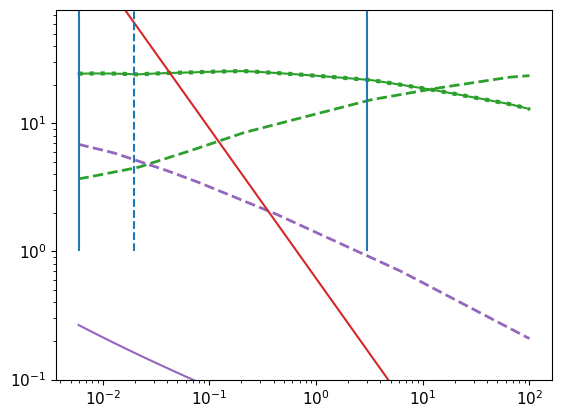

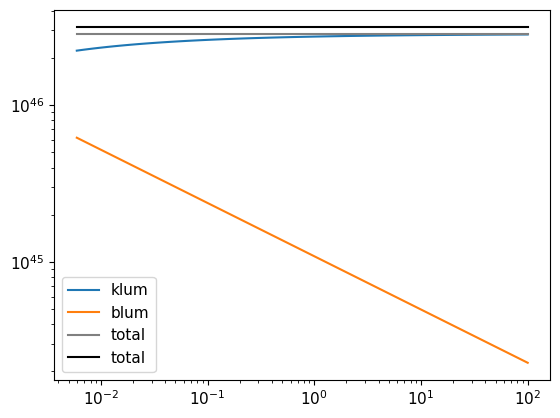



####################################

rRDR = 0.29999999999999993 == 0.00594724326260689 pc
ETA_ACC @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 833.296409790478
eemax::: 2.53e+06 eV
ETA_ACC(z=5.9e-03 pc): 8.33e+02


/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:1233: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ntrapz = np.trapz(plaw, egrid)
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:1235: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  etotal = np.trapz(normalized * egrid, egrid) * u.eV.to(u.erg)
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:447: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  etrapz = np.trapz(epowerlaw / egrid, egrid)
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:475: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functio

eemax::: 2.53e+06 eV
3 real_epmax, real_eemax: 1.63e+13 (changed to 1e17), 2.53e+06
plum = 0.0089 L_Edd (log -3.05), p/e = 1.2e+04


####################################

rRDR = 0.3242849018199919 == 0.006428670658380279 pc
ETA_ACC @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 505.7988594022165
eemax::: 4.17e+06 eV
ETA_ACC(z=6.4e-03 pc): 5.06e+02


/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:507: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_rad_power = np.trapz(jet_pho / egrid_pho, egrid_pho) * 4 * np.pi * (10**r) ** 2 * const.c.cgs.value # erg/s, jet frame
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:555: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n_p = np.trapz(am3.get_protons() / am3.get_egrid_had(), am3.get_egrid_had()) * 4./3 * np.pi * (10**r) ** 2 * 3e10
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:556: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n_e = np.trapz(am3.get_electrons() / am3.get_egrid_lep(), am3.get_egrid_lep()) * 4./3 * np.pi *

eemax::: 4.17e+06 eV
3 real_epmax, real_eemax: 3.63e+13 (changed to 1e17), 4.17e+06
plum = 0.0113 L_Edd (log -2.95), p/e = 1.4e+04


####################################

rRDR = 0.35053565849467266 == 0.006949069444286374 pc
ETA_ACC @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 318.7083367840188
eemax::: 6.23e+06 eV
ETA_ACC(z=6.9e-03 pc): 3.19e+02
eemax::: 6.23e+06 eV
3 real_epmax, real_eemax: 7.31e+13 (changed to 1e17), 6.23e+06
plum = 0.0137 L_Edd (log -2.86), p/e = 1.7e+04


####################################

rRDR = 0.3789114053311705 == 0.007511594341602375 pc
ETA_ACC @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 207.88841022351693
eemax::: 9.29e+06 eV
ETA_ACC(z=7.5e-03 pc): 2.08e+02
eemax::: 9.29e+06 eV
3 real_epmax, real_eemax: 1.47e+14 (changed to 1e17), 9.29e+06
plum = 0.0166 L_Edd (log -2.78), p/e = 1.9e+04


####################################

rRDR = 0.409584159587646 == 0.008119655445260443 pc
ETA_ACC @@@@@@@@@@@@@@@@@@@@@@@

/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[x<threshold] *= 0
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2984751861.py:333: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[x<threshold] *= 0
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:859: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:150: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or

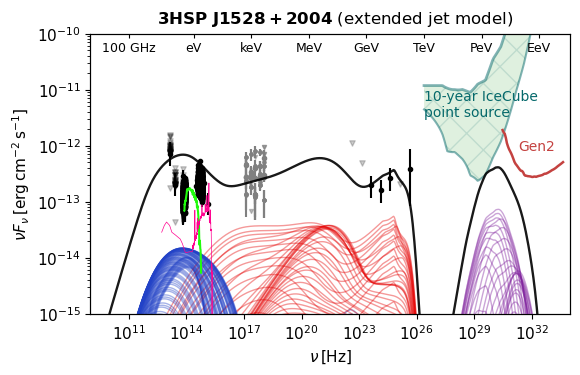

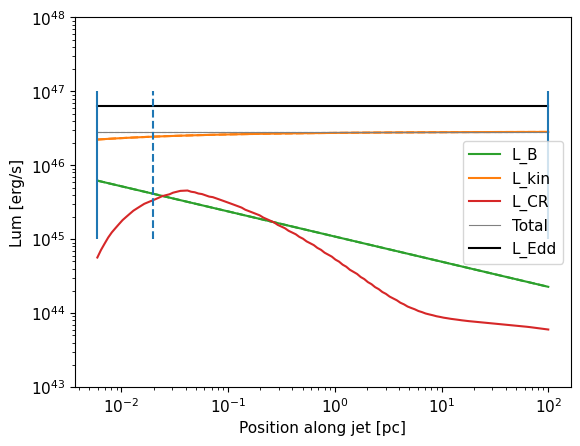

/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:910: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  elum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in lep_arrays])
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:911: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  plum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in had_arrays])
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:913: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pslum_arr = np.array([np.trapz(ta['ps'] /  ta['x_pho'], ta['x_pho']) for ta in sed_arrays])
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:914: Deprec

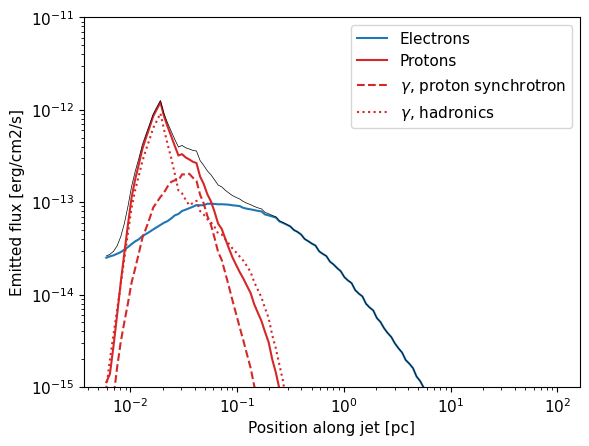

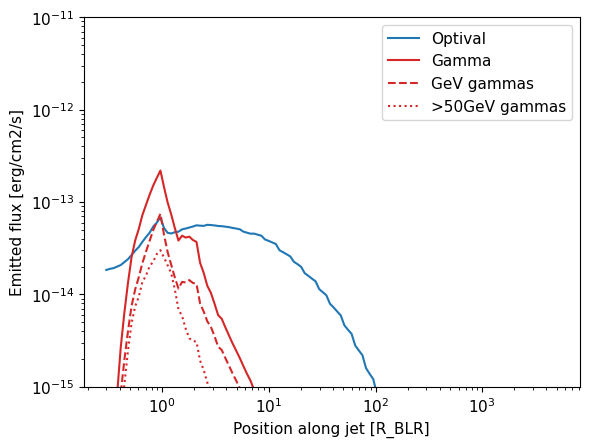

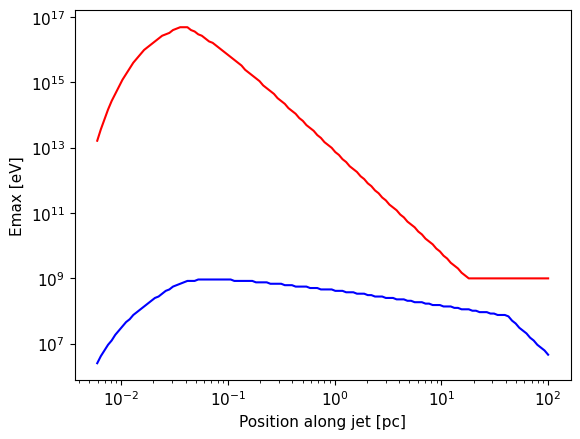

eta min: 2.9574810151420836 r(eta min): 2.1001877167674463 R_BLR


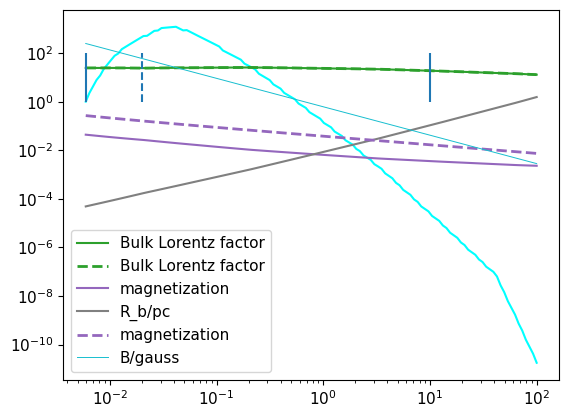

In [50]:
for _ in [0]:

    for s in CAT:
        if not CAT[s]['associated_to_alert']:
            continue
        if 'MSQ' != CAT[s]['masq']:
            continue
        if '2004' not in s:
            continue
        print('Source:', s)
        source=CAT[s]
        break

    FTHETA = 0.2 # 0.25 // 0.28
    r_i = 0.3 #7e-3 * u.pc.to(u.cm) / R_BLR # 9e16/R_BLR # 0.3
    r_f = 100 * u.pc.to(u.cm) / R_BLR #/R_BLR
    ZONES_PER_DECADE = 30
    PJET = eddington_lum(CAT[s]['M_BH']) * 0.9 # 0.47
    B_EVOL = 1.17 ### 1.18...
    PART_FRAC = 0.24
    DENS_INDEX = 1.85 # 
    ETA0 = 3.0
    ETAS = 1.5
    R_ETAMIN = 2.0 # 1.83 // 1.95 // 2.4

    ACC_ALPHA = 0.3

    EEMAX = 0 # 3e10 #m_p_ev 
    EPMAX = 0 #3e18

    PIND = 1.8
    EIND = 1.8

    THETA_OBS = 1.0 * np.pi / 180.

    # FRACTION OF **NONTHERMAL** PARTICLES DRAWN FROM THE THERMAL PLASMA POOL
    NP_FRAC = 1.5e-6
    NE_FRAC = 1.5e-6


    # s = '4FGLJ0509.4+0542' ## # DEBUG
    # source=CAT[s]

    print("selected source:", s)

    nulim_x = np.load(f"/Users/xrodrigu/analysis/sin/sin-v/data/2401icecube_limits/energies_{source['association'].replace(' ', '_')}.npy")
    nulim_min = np.load(f"/Users/xrodrigu/analysis/sin/sin-v/data/2401icecube_limits/flux_low_epeak_{source['association'].replace(' ', '_')}.npy")
    nulim_max = np.load(f"/Users/xrodrigu/analysis/sin/sin-v/data/2401icecube_limits/flux_high_epeak_{source['association'].replace(' ', '_')}.npy")

    if s in ["3FGLJ0627.9-1517", "4FGLJ0344.4+3432", "3FGLJ1258.4+2123"]:
        nulim_min *= 0

    peakmin, peakmax = source['thermal_and_syn_fits']['synpeak']
    peakmin, peakmax = peakmin / ev_to_hz , peakmax / ev_to_hz
    fluxmin, fluxmax = source['thermal_and_syn_fits']['synflux']    
    eblx, ebly = source['ebl_tau']
    gex = CAT[s]['thermal_and_syn_fits']['host'][0] * 1
    gey = CAT[s]['thermal_and_syn_fits']['host'][1] * 1

    data_x = source['data2311'][0] * 1
    data_y = source['data2311'][1] * 1
    data_errlo = source['data2311'][2] * 1
    data_errup = source['data2311'][3] * 1
    detections = source['data2311'][4]
    is_uplim = (~detections) # + (data_x < (300e9)) # Now, use radio
    data_x /= ev_to_hz
    data_err = np.maximum(data_errlo,data_errup)
    binned_x, binned_y, binned_err, binned_isuplim = bin_data(data_x, data_y, data_err, is_uplim)
        
    rog = np.where((binned_x > np.log10(4e-2)) * (binned_x < np.log10(8e-2)))[0]
    binned_x, binned_y, binned_err, binned_isuplim = (np.delete(binned_x,rog),
                                                    np.delete(binned_y,rog),
                                                    np.delete(binned_err,rog),
                                                    np.delete(binned_isuplim,rog)
                                                    )

    PARAMS['sourcename'] = s
    PARAMS['z'] = source['z']
    PARAMS['plum'] = 0.
    PARAMS['masquerading'] = source['masq']
    PARAMS['disk_lum'] = source['thermal_and_syn_fits']['disk'][2]
    # # TRY
    # PARAMS['disk_lum'] = 10**44.8
    R_BLR = 1e17 * (PARAMS['disk_lum'] / 1e45) ** 0.5  # [cm]
    R_TORUS = 2.5e18 * (PARAMS['disk_lum'] / 1e45) ** 0.5 # [cm]

    BLR_COVERING = 0.1 / 1.5 
    TORUS_COVERING = 0.3
    
    print("REDSHIFT:", PARAMS['z'])
    ###

    def model_rblob(z,lor):
        rb = z * np.tan(FTHETA/lor)

        return rb

    RDR_ARR = np.logspace(np.log10(r_i), # R_BLR = 6e16
                        np.log10(r_f),int(ZONES_PER_DECADE * np.log10(r_f/r_i)))  #          ARRAY         ---------________---------


    def model_b_from_blum_bhf(z, lor, blum_bhf):
        rblob = model_rblob(z,lor)
        blum_jetframe = blum_bhf / lor ** 2
        b = 2/rblob * (blum_jetframe / const.c.cgs.value) ** 0.5
        return b


    R_INIT = 3 * schwarzschild(CAT[s]['M_BH'])
    LOR_INIT = 1.
    B_INIT = model_b_from_blum_bhf(R_INIT, LOR_INIT, PJET)
    print(f"B_INIT: {B_INIT:.1e} G")


    BLR_COL_DEN = 1e24

    CUTOFF_POWER = R_INIT


    SIMTIME = 3

    # ETA_ACC = lambda z: 3. * (z / R_BLR) ** 0.43 ### WAS .8

    def ETA_ACC(z):
        z_peak = R_ETAMIN * R_BLR
        eta_peak = 1 / ETA0
        alpha = ETAS  # power-law index for the tail2

        def ecore(x):    
            rea_ratio = z_peak / x
            exp_core = 1. / (np.exp(- (rea_ratio)**1.0))
            return exp_core

        def plaw(x):
            power_law = 1. / (eta_peak * (x / z_peak) ** -alpha)
            power_law = np.maximum(power_law, power_law*0+ETA0)
            return power_law
        
        sample_array = R_BLR * np.logspace(-3,3,100)
        return (ecore(z) * plaw(z)) / eta_peak / np.min(ecore(sample_array) * plaw(sample_array))


    def model_b(z, binit=B_INIT, bevol=B_EVOL, rinit=R_INIT):
        b = binit * (z/rinit) ** -bevol
        return b


    def model_n_implicit(z, lor, dens_index=DENS_INDEX, partfrac=PART_FRAC, blr_col_den=BLR_COL_DEN):
        dens_dist_unnorm = lambda x: x ** - dens_index
        integ = np.trapz(dens_dist_unnorm(np.logspace(np.log10(6e15),np.log10(R_BLR),100)), np.logspace(np.log10(6e15),np.log10(R_BLR),100))
        densdist = dens_dist_unnorm(z) * blr_col_den / integ # [cm-3] ENVIRONMENT!!! 
        rblob = model_rblob(z,lor)
        beta = (1 - 1. / lor ** 2) ** 0.5
        n = densdist * np.pi * rblob ** 2 * partfrac * const.c.cgs.value * lor * beta # medium contraction
        # n *= volume_correction(z,lor) 
        return n

    def model_blum_bhf(z, lor, binit=B_INIT, bevol=B_EVOL, rinit=R_INIT):
        b = model_b(z,binit,bevol,rinit)
        rblob = model_rblob(z,lor)
        blum = maglum(b,rblob) * lor ** 2
        # blum *= volume_correction(z,lor)
        # blum *= jetpowerlossfactor(z,rinit)

        return blum

    def model_klum_bhf(z, lor, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, blr_col_den=BLR_COL_DEN):
        ''' In the black hole rest frame.
        '''
        n_init = model_n_implicit(rinit, lorinit, dens_index, partfrac, blr_col_den)
        klum_init = n_init * (const.m_p * const.c**2).to(u.erg).value * (lorinit-1) 

        blum_init = model_blum_bhf(rinit, lorinit, binit, bevol, rinit) 
        total_init = klum_init + blum_init
        # total_init *= volume_correction(z,lor) / volume_correction(rinit,lorinit)

        blum_at_z = model_blum_bhf(z, lor, binit, bevol, rinit)
        klum_at_z = total_init - blum_at_z # total_init * jetpowerlossfactor(z,rinit) - blum_at_z
        

        
        if np.any(klum_at_z < 0.):
            print(f"[model_klum_bhf]Error: some klum vals are negative: {np.min(klum_at_z):.1e}. Increase initial Lorentz factor or decrease B evolution!")
        return klum_at_z


    def model_lor(z, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, blr_col_den=BLR_COL_DEN):
        lor = get_prescribed('lor', z)
        klum = model_klum_bhf(z, lor, lorinit, rinit, partfrac, dens_index, binit, bevol, blr_col_den)
        n = model_n_implicit(z, lor, dens_index, partfrac, blr_col_den)   
        lor = (klum / n / (const.m_p * const.c**2).to(u.erg).value) + 1
        
        if np.any(klum < 0):
            print("[model_lor]Warning:", np.sum(klum < 0), "negative L_kin vals ! Returning Gamma_bulk = 1  for those cases.")
            lor = np.where(klum<0,lor*0+1,lor)

        n = model_n_implicit(z, lor, dens_index, partfrac, blr_col_den)# model_n(z, lor, index=dens_index, partfrac=partfrac, blr_col_den=blr_col_den)
        klum = model_klum_bhf(z, lor, lorinit, rinit, partfrac, dens_index, binit, bevol, blr_col_den)
        lor = (klum / n / (const.m_p * const.c**2).to(u.erg).value) + 1

        return lor

    def model_n(z, lor, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, blr_col_den=BLR_COL_DEN, binit=B_INIT, bevol=B_EVOL):
        klum = model_klum_bhf(z, lor, lorinit, rinit, partfrac, dens_index, binit, bevol, blr_col_den)
        n = klum / ((lor-1) * MPERG)   # medium contraction
        return n

    def model_den(z, lor, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, blr_col_den=BLR_COL_DEN, binit=B_INIT, bevol=B_EVOL):
        n = model_n(z, lor, lorinit, rinit, partfrac, dens_index, blr_col_den, binit, bevol)
        rblob = model_rblob(z,lor)
        den = n / (np.pi * rblob ** 2 * const.c.cgs.value) / lor # time dilation in the jet
        return den

    def model_magnetization(z, lor, lorinit=LOR_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, rinit=R_INIT, blr_col_den=BLR_COL_DEN):
        b = model_b(z,binit,bevol,rinit)
        den = model_den(z, lor, lorinit, rinit, partfrac, dens_index, blr_col_den, binit, bevol)
        sigma = calc_sigma(b,den)
        return sigma

    # def model_lor_double(z, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, blr_col_den=BLR_COL_DEN):
    #     mperg = (const.m_p * const.c ** 2).to(u.erg).value
        
    #     def f(lor):
    #         klum = model_klum_bhf(z, lor, lorinit, rinit, partfrac, dens_index, binit, bevol, blr_col_den)
    #         blum = model_blum_bhf(z, lor, binit, bevol, rinit)
    #         n = 10 ** 45 * 100 #model_n(z, lor, index=dens_index, partfrac=partfrac, blr_col_den=blr_col_den)
    #         print(f"klum: {klum} erg/s")
    #         print(f"n: {n * mperg} erg/s. z={z}, lor={lor}")
    #         return lor - 1 - (klum) / (n * mperg)

    #     from scipy.optimize import root_scalar
    #     root = root_scalar(f, bracket=[1.01, 1e30], method="brentq").root
    #     lor = root

    #     return lor

    # model_lor = np.vectorize(lambda z: model_lor_double(z, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, blr_col_den=BLR_COL_DEN))


    # def model_lor2(z, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, blr_col_den=BLR_COL_DEN):
    #     mperg = (const.m_p * const.c ** 2).to(u.erg).value
    #     lor = get_prescribed('lor', z)
    #     klum = (z, lor, lorinit, rinit, partfrac, dens_index, binit, bevol, blr_col_den):
    #     n = model_n(z, lor, index=dens_index, partfrac=partfrac, blr_col_den=blr_col_den)
    #     f = lambda lor: lor - 1 - klum / (n * mperg)

    #     from scipy.optimize import fsolve
    #     root = fsolve(f,100.)
        
    #     return root
    # mliv = np.vectorize(lambda z: model_lor2(z, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, dens_index=DENS_INDEX, binit=B_INIT, bevol=B_EVOL, blr_col_den=BLR_COL_DEN))

    # def setup_model():



    f3 = plt.figure()


    rarr = RDR_ARR * R_BLR 
    # rarr = np.logspace(np.log10(R_INIT), np.log10(RDR_ARR[-1] * R_BLR), 100)

    magnet_presc_arr = np.array([get_prescribed('mag', r) for r in rarr])
    lor_presc_arr = np.array([get_prescribed('lor', r) for r in rarr])
    rblob_presc_arr = rarr * np.sin(1./lor_presc_arr)


    lorarr = model_lor(rarr)
    magarr = model_magnetization(rarr, lorarr)
    barr = model_b(rarr)
    narr = model_n(rarr,lorarr)
    mperg = (const.m_p * const.c**2).to(u.erg).value

    klarr = model_klum_bhf(rarr, lorarr)
    blarr = model_blum_bhf(rarr, lorarr)



    plt.loglog(rarr*u.cm.to(u.pc), lorarr,c='tab:green')
    # plt.loglog(rarr*u.cm.to(u.pc), mliv(rarr),c='m',lw=3,ls=':')
    plt.loglog(rarr*u.cm.to(u.pc), lor_presc_arr, c='tab:green', ls='--',lw=2)
    plt.loglog(rarr*u.cm.to(u.pc), klarr / (narr * mperg) + 1, c='tab:green', ls=':',lw=3.)


    plt.loglog(rarr*u.cm.to(u.pc), magarr, c='tab:purple')
    plt.loglog(rarr*u.cm.to(u.pc), magnet_presc_arr,c='tab:purple',ls='--',lw=2)

    plt.loglog(rarr*u.cm.to(u.pc), barr, c='tab:red')

    plt.vlines([R_BLR*u.cm.to(u.pc), RDR_ARR[0] * R_BLR * u.cm.to(u.pc), 3.], 1e0,1e2,ls=['--', '-', '-'])

    plt.ylim([1e-1,np.max(lorarr)*3])

    plt.show()



    plt.loglog(rarr*u.cm.to(u.pc), klarr,label='klum')
    plt.loglog(rarr*u.cm.to(u.pc), blarr,label='blum')
    plt.loglog(rarr*u.cm.to(u.pc), (blarr+klarr),c='gray',label='total')
    plt.loglog(rarr*u.cm.to(u.pc), rarr*0 + eddington_lum(CAT[s]['M_BH']),c='k',label='total')
    plt.legend()
    # plt.loglog(rarr, [get_prescribed('lor', r) for r in rarr], ls='--')

    plt.show()



    plt.close() # STAYS


    ##########################################################################################################################################################################################################################################################################################################################################################################################
    ##########################################################################################################################################################################################################################################################################################################################################################################################
    #break
    ##########################################################################################################################################################################################################################################################################################################################################################################################
    ##########################################################################################################################################################################################################################################################################################################################################################################################




    GAMMAMIN = lambda lor: 100 # lor DEBUG@ -- effect on NNT

    def compute_parameters(rdr, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, binit=B_INIT, bevol=B_EVOL):#### Compute self-consistent jet parameters


        z = rdr * R_BLR
        
        ealpha = EIND
        pind = PIND
        
        real_lor = model_lor(z)
        real_rblob = model_rblob(z, real_lor)
        # real_magnetization = model_magnetization(z, real_lor)
        real_n = model_n(z, real_lor)
        real_den = model_den(z, real_lor)
        real_b = model_b(z)
        # DEBUG: test Lorentz-dependent threshold hypothesis for electrons
        print("ETA_ACC @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@", ETA_ACC(z))
        esti_eemax = EEMAX if EEMAX else am3.get_egrid_lep()[get_imax('e', ETA_ACC(z), real_b, real_rblob, cool=True, esc=False, include_compton=False, secondorder=1, number_density=real_den, alpha=ACC_ALPHA)] 
        esti_epmax = am3.get_egrid_had()[get_imax('p', ETA_ACC(z), real_b, real_rblob, cool=False, esc=True, include_compton=False, secondorder=1, number_density=real_den, alpha=ACC_ALPHA)]

        real_lum_e = get_etotal_from_number(real_n * NE_FRAC, ealpha, GAMMAMIN(real_lor) * m_e_ev, esti_eemax)
        real_lum_p = get_etotal_from_number(real_n * NP_FRAC, pind, GAMMAMIN(real_lor) * m_p_ev, esti_epmax)

        # Calculate parameters
        r = np.log10(real_rblob)
        b = np.log10(real_b)
        egmax = np.log10(esti_eemax / m_e_ev)
        elum = np.log10(real_lum_e)
        lor = np.log10(real_lor)
        plum = np.log10(real_lum_p)
        pgmax = np.log10(esti_epmax / m_p_ev)

        return r, b, egmax, ealpha, elum, lor, rdr, plum, pgmax, pind


    # # Double-check particle numbers
    # n_p = get_n_total(pind, m_p_ev * real_lor, esti_epmax, real_lum_p)
    # n_e = get_n_total(ealpha, m_e_ev * real_lor, esti_eemax, real_lum_e)
    # lum_cold = real_n * (const.m_p * const.c ** 2).cgs.value * real_lor
    # lum_mag = real_b ** 2 * (real_rblob) ** 2 * 3e10
    # # Double-checkl derived magnetization
    # sigma = magnetization(real_b, n_p * real_lor, (real_lum_e + real_lum_p)*1, real_rblob) 


    ### Plot
    plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['axes.labelsize'] = 11
    plt.rcParams['legend.fontsize'] = 11
    plt.rcParams['axes.titlesize'] = 11
    plt.rcParams['font.size'] = 11

    plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 11
    plt.rcParams['axes.labelsize'] = 11
    plt.rcParams['legend.fontsize'] = 11
    plt.rcParams['axes.titlesize'] = 11
    plt.rcParams['font.size'] = 11

    colors = ["#FF0000", "#00FF00", "#0000FF", "k", "#FF00FF", "#00FFFF", "#800000", "#008000", "#000080", "#808000", "#800080", "#008080", "#FFA500", "#A52A2A", "#800080", "#008080", "#ADD8E6", "#FFC0CB", "#FF4500", "#800000", "#8B4513", "#2E8B57", "#8B008B", "#000080", "#4B0082", "#228B22", "#D2691E", "#FFD700", "#7CFC00", "#20B2AA", "#6A5ACD", "#9400D3", "#DC143C", "#191970", "#8A2BE2", "#A9A9A9", "#696969", "#D3D3D3", "#000000", "#FFFFFF", "#F0F8FF", "#FAEBD7", "#00FFFF", "#7FFFD4", "#F0FFFF", "#F5F5DC", "#FFE4C4", "#000000", "#F8F8FF", "#FFEBCD"]


    # Energy arrays in source frame
    egrid_pho = am3.get_egrid_photons()
    egrid_nu = am3.get_egrid_neutrinos()

    fig1 = plt.figure(figsize=(6,4))
    ax1 = plt.gca()

    carr = list(mycolors) * 100

    total_arrays = []
    total_syn_arrays = []
    lep_arrays = []
    had_arrays = []
    total_nus = []
    rate_arrays = []
    sed_arrays = []
    total_edd = 0.


    for ic, (rdr, c) in enumerate(zip(RDR_ARR, carr)):
        
        z = rdr * R_BLR




        PLOT_ALL = False
        if ic == 3:
            PLOT_ALL = False


        # if ic == RDR_ARR.size - 1:
        #     NP_FRAC = NFRAC_FLARE
        #     NE_FRAC = NFRAC_FLARE
    

        print("\n\n####################################\n\n"+f"rRDR = {rdr} == {rdr * R_BLR * u.cm.to(u.pc)} pc")
        
        r, b, egmax, ealpha, elum, lor, _, plum, pgmax, pind = compute_parameters(rdr, lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, binit=B_INIT, bevol=B_EVOL)
        

        print(f"ETA_ACC(z={z*u.cm.to(u.pc):.1e} pc): {ETA_ACC(z):.2e}")                                              


        real_rblob = 10 ** r #model_rblob(z, real_lor)
        real_b = 10 ** b # model_b(z, binit=B_INIT, bevol=B_EVOL, rinit=R_BLR)
        real_lor = 10 ** lor#model_lor(z, lorinit=LOR_INIT, rinit=R_BLR, partfrac=PART_FRAC, densdist=DENS_DIST, binit=B_INIT, bevol=B_EVOL)
        real_n = model_n(z, real_lor)
        real_den = model_den(z, real_lor)
        dopp = doppler_factor(THETA_OBS, real_lor)


        # Energy arrays in the observer's frame

        egrid_obs = egrid_pho * dopp / (1 + PARAMS['z'])
        egrid_nu_obs = egrid_nu * dopp / (1 + PARAMS['z'])
        atten = dominguez.evaluate(egrid_obs * u.eV, CAT[s]['z'], 1.0)

        # SIMULATION

        PARAMS['egammamin'] = GAMMAMIN(real_lor)

        # if rdr == RDR_ARR[0]: b -= 0.0                                                                                 #### ADJUSTMENTS

        escaped = cost_function(r, b, egmax, ealpha, elum, lor, rdr, plum, pgmax, pind, pgmin=np.log10(GAMMAMIN(real_lor)))

        imaxp = get_imax('p', ETA_ACC(z), 10**b, 10**r, cool=True, esc=True, include_compton=False,secondorder=1, number_density=real_den, alpha=ACC_ALPHA)
        imaxe = get_imax('e', ETA_ACC(z), 10**b, 10**r, cool=True, esc=True, include_compton=True,secondorder=1, number_density=real_den, alpha=ACC_ALPHA)

        real_epmax = EPMAX if EPMAX else am3.get_egrid_had()[imaxp]
        real_eemax = EEMAX if EEMAX else am3.get_egrid_lep()[imaxe] 

        print("3 real_epmax, real_eemax:", f"{real_epmax:.2e} (changed to 1e17), {real_eemax:.2e}")
        

        if (real_epmax > (10**pgmax * m_p_ev) * 1.05 or 
            real_epmax < (10**pgmax * m_p_ev) / 1.05 or
            real_eemax > (10**egmax * m_e_ev) * 1.05 or 
            real_eemax < (10**egmax * m_e_ev) / 1.05):
            print(f"PGammaMax ADJUSTMENT: was {10**pgmax:.2e}, is {real_epmax / m_p_ev:.2e}")
            pgmax = np.log10(real_epmax / m_p_ev)
            egmax = np.log10(real_eemax / m_e_ev)
            real_lum_e = get_etotal_from_number(real_n * NE_FRAC, ealpha, GAMMAMIN(real_lor) * m_e_ev, real_eemax)
            real_lum_p = get_etotal_from_number(real_n * NP_FRAC, pind, GAMMAMIN(real_lor) * m_p_ev, real_epmax)  # REAL_N? ##
            elum = np.log10(real_lum_e)
            plum = np.log10(real_lum_p)

            escaped = cost_function(r, b, egmax, ealpha, elum, lor, rdr, plum, pgmax, pind, pgmin=np.log10(GAMMAMIN(real_lor)))

        edd_jetframe = (eddington_lum(CAT[s]['M_BH']) * 2 / (10**lor) ** 2)
            
        

        # print("r, b, egmax, ealpha, elum, lor, rdr, plum, pgmax, pind:")
        # print(r, b, egmax, ealpha, elum, lor, rdr, plum, pgmax, pind)
        # print(f"{'z':20s} {z:.2e} (R_BLR = {R_BLR:.2e})")
        # print(f"{'lor':20s} {10**lor:.2e}")
        # print(f"{'n (elec, prot):':20s} {real_n:.2e}, {real_n * NP_FRAC:.2e}")
        # # print(f"{'lum_e':20s} {real_lum_e:.2e}")
        # # print(f"{'lum_p':20s} {real_lum_p:.2e}")
        # print(f"{'esti_eemax':20s} {real_eemax:.2e} eV")
        # print(f"{'esti_epmax':20s} {real_epmax:.2e} eV")
        # print(f"{'magnetization':20s} {magnetization:.2e}")
        # print(f"{'B-field:':20s} {10**b:.2e}")
        # print(f"{'Luminosities (cold, hot, mag, total, Edd, fraction):':20s} {lum_cold:.2e}, {real_lum_p:.2e}, {lum_mag:.2e}, {lum_jet:.2e}, {edd_jetframe:.2e} {lum_jet/edd_jetframe:.2e}")


        all_nu = am3.get_neutrinos() * egrid_nu * u.eV.to(u.erg)
        external_pho = am3.get_injection_rate_photons() * am3.get_escape_timescale() *  egrid_pho * u.eV.to(u.erg)
        leptonic = am3.get_photons_injected_electrons_syn_compton() * egrid_pho * u.eV.to(u.erg)
        syn = am3.get_photons_injected_electrons_syn() * egrid_pho * u.eV.to(u.erg)
        icompton = am3.get_photons_injected_electrons_compton() * egrid_pho * u.eV.to(u.erg)
        annihil = am3.get_photons_annihilation_pairs_syn_compton() * egrid_pho * u.eV.to(u.erg)
        all_photons = am3.get_photons() * egrid_pho * u.eV.to(u.erg)
        bheitler = am3.get_photons_bethe_heitler_pairs_syn_compton() * egrid_pho * u.eV.to(u.erg)
        pgamma = am3.get_photons_photo_pion_pairs_syn_compton() * egrid_pho * u.eV.to(u.erg)
        pi0decay = am3.get_photons_pi0_decay() * egrid_pho * u.eV.to(u.erg)
        proton_syn_ic = am3.get_photons_protons_syn_compton() * egrid_pho * u.eV.to(u.erg)
        jet_pho = am3.get_photons_except_injected() *  egrid_pho * u.eV.to(u.erg)
        totals = jet_pho# + 10 ** np.interp(np.log10(egrid_obs), 
                        #               np.log10(gex / ev_to_hz / (1 + source['z'])), 
                        #              np.log10(gey),left=-100,right=-100)
        hadronic = annihil + bheitler + pgamma + pi0decay + proton_syn_ic


        total_rad_power = np.trapz(jet_pho / egrid_pho, egrid_pho) * 4 * np.pi * (10**r) ** 2 * const.c.cgs.value # erg/s, jet frame

        rate_arrays.append({'x_lep' : am3.get_egrid_lep() * 1.0,
                            'x_had' : am3.get_egrid_had() * 1.0,
                            'x_pho' : am3.get_egrid_photons() * 1.0,
                            'annil' : am3.get_t_photon_annihilation(),
                            'ecool' : 1/(1/am3.get_t_pair_syn() + 1/am3.get_t_pair_compton()),
                            'esyn' : am3.get_t_pair_syn(),
                            'ecom' : am3.get_t_pair_compton(),
                            'pcool' : 1/(1/am3.get_t_proton_photopion() + 1 / am3.get_t_proton_bethe_heitler() + 1 / am3.get_t_proton_syn()),
                            'pcool_pgamma' : am3.get_t_proton_photopion(),
                            'pcool_behei' : am3.get_t_proton_bethe_heitler(),
                            'pcool_syn' : am3.get_t_proton_syn(),
                            'acc1' : calc_accel(am3.get_egrid_lep(), ETA_ACC(z), 10 ** b, stoch=False),
                            'acc2' : calc_accel(am3.get_egrid_lep(), ETA_ACC(z), 10 ** b, stoch=True, coherence_scale=10**r, number_density=real_den),
                            'tau_stoch' : tau_stoch(am3.get_egrid_had(), 
                                                    10 ** b, 
                                                    coherence_scale=10 ** r,
                                                    eta=ETA_ACC(z)),
                            'eta' : ETA_ACC(z),
                            'emax_e' : 10 ** egmax * (const.m_e * const.c ** 2).to(u.eV).value,
                            'emax_p' : 10 ** pgmax * (const.m_p * const.c ** 2).to(u.eV).value,
                            'b' : 10 ** b,
                            'lor' : 10 ** lor,
                            'r' : 10 ** r,
                            'kinlum' : model_klum_bhf(z, 10 ** lor),
                            'maglum' : model_blum_bhf(z, 10 ** lor),
                            'crlum' : 10 ** plum,
                            'radlum' : total_rad_power,
                            'elum' : 10 ** elum,
                            'eddlum' : edd_jetframe,
                            'n' : real_n,
                            'rho' : real_den,
                            'ele_curr' : am3.get_electrons(),
                            'eesc' : am3.get_t_pair_escape(),
                            'eesc_bohm' : 10 ** r * (10 ** r / larmor(am3.get_egrid_lep(), 10 ** b)) / const.c.cgs.value,
                            'pesc' : am3.get_t_proton_escape(),
                            # 'nesc' : am3.get_t_neutron_escape(),
                            'ele_inje' : am3.get_injection_rate_electrons(),
                            'pro_curr' : am3.get_protons(),
                            'pro_inje' : am3.get_injection_rate_protons(),
                            'escaped' : escaped
                        })

        

        plt.figure(fig1.number)

        n_p = np.trapz(am3.get_protons() / am3.get_egrid_had(), am3.get_egrid_had()) * 4./3 * np.pi * (10**r) ** 2 * 3e10
        n_e = np.trapz(am3.get_electrons() / am3.get_egrid_lep(), am3.get_egrid_lep()) * 4./3 * np.pi * (10**r) ** 2 * 3e10

        l_p = np.trapz(am3.get_protons(), am3.get_egrid_had()) * 4./3 * np.pi * (10**r) ** 2 * 3e10 * u.eV.to(u.erg)
        l_e = np.trapz(am3.get_electrons(), am3.get_egrid_lep()) * 4./3 * np.pi * (10**r) ** 2 * 3e10 * u.eV.to(u.erg)

        m_e_ev = (const.m_e*const.c**2).to(u.eV).value
        m_p_ev = (const.m_p*const.c**2).to(u.eV).value

        # GET CONVERSION FACTORS 
    
        density_to_lum = 4 * np.pi * (10**r) ** 2 * const.c.cgs.value

        spectrum_conversion = density_to_lum * dopp ** 4 / (4 * np.pi * (cosmo.luminosity_distance(PARAMS['z']).cgs.value) ** 2) * np.log(10) / ZONES_PER_DECADE

        # Energy arrays in source frame

        hadronic_obs = hadronic * spectrum_conversion
        leptonic_obs = leptonic * spectrum_conversion
        syn_obs = syn * spectrum_conversion
        icompton_obs = icompton * spectrum_conversion
        pp_obs = annihil * spectrum_conversion
        ps_obs = proton_syn_ic * spectrum_conversion
        bh_obs = bheitler * spectrum_conversion
        pi0_obs = pi0decay * spectrum_conversion
        pg_obs = pgamma * spectrum_conversion
        all_nu_obs = all_nu * spectrum_conversion
        jet_obs = jet_pho * spectrum_conversion


        total_arrays.append([egrid_obs, jet_obs, atten])
        total_syn_arrays.append([egrid_obs, syn_obs + ps_obs, atten])
        lep_arrays.append([egrid_obs, leptonic_obs, atten])
        had_arrays.append([egrid_obs, hadronic_obs, atten])
        total_nus.append([egrid_nu_obs, all_nu_obs])

        protons = am3.get_protons() * am3.get_egrid_had() * u.eV.to(u.erg)
        electrons = am3.get_electrons() * am3.get_egrid_lep() * u.eV.to(u.erg)



        sed_arrays.append({'x_lep' : am3.get_egrid_lep() * 1.0,
                            'x_had' : am3.get_egrid_had() * 1.0,
                            'x_pho' : am3.get_egrid_photons() * 1.0,
                            'x_nu' : am3.get_egrid_neutrinos() * 1.0,
                            'x_pho_obs' :  egrid_obs * 1.0,
                            'x_nu_obs' : egrid_nu_obs * 1.0,
                            'hadronic' : hadronic_obs * 1.0,
                            'syn' : syn_obs * 1.0,
                            'icompton' : icompton_obs * 1.0,
                            'pp' : pp_obs * 1.0,
                            'ps' : ps_obs * 1.0,
                            'pi0' : pi0_obs * 1.0,
                            'bh' : bh_obs * 1.0,
                            'pg' : pg_obs * 1.0,
                            'all_nu' : all_nu_obs * 1.0,
                            'total' : jet_obs  * 1.0,
                            'nupeak' : am3.get_egrid_neutrinos()[np.argmax(all_nu_obs)]
                        })



        # plt.loglog(egrid_obs * ev_to_hz, leptonic_obs * atten,ls='--',zorder=100,
        #     lw=1.5,alpha=0.5,color=c)

        lw=1.0

        # plt.loglog(egrid_obs * ev_to_hz, jet_obs * atten,ls='-', # hadronic_obs
        #     lw=lw,alpha=0.5,color=c,label=f'{rdr:.1f} R_BLR')

        plt.loglog(egrid_obs * ev_to_hz, hadronic_obs * atten,ls='-', # hadronic_obs
            lw=lw,alpha=0.4,color=sns.xkcd_rgb['red'],label=f'{rdr:.1f} R_BLR')
        plt.loglog(egrid_obs * ev_to_hz, leptonic_obs * atten,ls='-', # hadronic_obs
            lw=lw,alpha=0.4,color=sns.xkcd_rgb['blue blue'],label=f'{rdr:.1f} R_BLR')


        
        # plt.loglog(egrid_obs * ev_to_hz, bh_obs * atten,ls='-.',
        #     lw=1.5,alpha=0.5,color=c)
        
        # plt.loglog(egrid_obs * ev_to_hz, pp_obs * atten,ls=':',
        #     lw=1.5,alpha=0.5,color=c)

        # plt.loglog(egrid_obs * ev_to_hz, ps_obs  * atten,ls='--',
        #     lw=1.5,alpha=0.5,color=c)



        # plt.loglog(egrid_obs * ev_to_hz, pg_obs  * atten,ls='--',
        #     lw=1.5,alpha=0.5,color=c,label=f'{rdr:.1f} R_BLR')

        # Plot all-flavor neutrino spectrum
        plt.loglog(egrid_nu_obs * ev_to_hz, all_nu_obs  / 3.,zorder=100,
                lw=1.0, color=sns.xkcd_rgb['purple'],alpha=0.4)

        el = 10 ** elum
        pl = 10 ** plum
        lr = 10 ** lor
        eddlum = np.array(eddington_lum(CAT[s]['M_BH']))
        pe = pl * lr ** 2 / 2 / eddlum
        ee = el * lr ** 2 / 2 / eddlum
        total_edd += np.array([pe,ee])
        print(f"plum = {pe:.4f} L_Edd (log {np.log10(pe/10):.2f}), p/e = {pe/ee:.1e}")


    # PHOTONS

    total_x = total_arrays[0][0]
    print("TOTAL_X NANMAX:", np.nanmax(total_x))

    total_syn = total_syn_arrays[0][1] * 0
    total_y = total_arrays[0][1] * 0
    total_y_unatten = total_arrays[0][1] * 0
    # total_photons_escaped = total_arrays[0][1] * 0

    for (x,y,att),(_,ysyn,att), di in zip(total_arrays, total_syn_arrays, rate_arrays):
        if np.all(np.isnan(y)):
            print("z=", z, "y is all NaNs")
            continue
        total_y = np.nansum([total_y, np.interp(total_x, x, y * att)], axis=0)
        total_syn = np.nansum([total_syn, np.interp(total_x, x, ysyn * att)], axis=0)
        total_y_unatten = np.nansum([total_y_unatten, np.interp(total_x, x, y)], axis=0) 
        # total_photons_escaped += np.interp(total_x, x, di['escaped']['g'] / di['r']*const.c.cgs.value * di['lor'] ** 4 / (4 * np.pi * (cosmo.luminosity_distance(PARAMS['z']).cgs.value) ** 2) * att)

    ## NEUTRINOS
    totalnu_x = total_nus[0][0]
    totalnu_y = total_nus[0][1] * 0 

    for x,y in total_nus:
        totalnu_y += np.interp(totalnu_x, x, y)

    ## EBL ATTENUATION

    # xprop, pointsource, eblcascades, pairs = propagate(total_x * (1 + PARAMS['z']), total_y_unatten, z_source=PARAMS['z'], igmf_gauss=1e-16, include_cascade=True, delta_t=0.01)

    # plt.loglog(xprop * ev_to_hz, pointsource, ls='-',zorder=100,
    #     lw=1.5,alpha=0.5,color='k')


    # plt.loglog(total_x * ev_to_hz, total_y_unatten, ls='--',zorder=2000,
    #     lw=1.5,alpha=0.5,color='k')

    # total_y += 10 ** np.interp(np.log10(total_x), np.log10(gex / ev_to_hz / (1 + source['z'])), np.log10(gey), left=-100,right=-100)



    plt.loglog(total_x * ev_to_hz, total_y, ls='-',zorder=2000,
        lw=1.7,alpha=0.9,color='k')

    # plt.loglog(total_x * ev_to_hz, total_syn, ls=':',zorder=2000,
    #     lw=1.7,alpha=0.9,color='k')

    plt.loglog(totalnu_x * ev_to_hz, totalnu_y / 3., ls='-',zorder=2000,
        lw=1.7,alpha=0.9,color='k')

    STEADY_TXS_X, STEADY_TXS_Y = total_x * ev_to_hz, total_y * 1.
    STEADY_TXS_NU_X, STEADY_TXS_NU_Y = totalnu_x * ev_to_hz, totalnu_y / 3.

    TOTALNU_X_TXS, TOTALNU_Y_TXS = totalnu_x * 1., totalnu_y * 1.


    plt.xlabel(r"$\nu\,[\mathrm{Hz}]$")
    plt.ylabel(r"$\nu F_\nu\,[\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1}]$")

    plt.annotate(f"{PARAMS['sourcename']}\nPhoton emission\nJet rest frame", 
                (3e-7,8e-2), 
                fontsize=13, 
                horizontalalignment='left')

    # plt.legend(loc='lower left', fontsize=8,frameon=1,ncol=1)

    # Plot host
    plt.loglog(gex, gey, c=sns.xkcd_rgb['electric green'],label='Host galaxy',alpha=1.0,zorder=1000)

    # Plot disc
    # dx = np.array(CAT[s]['thermal_and_syn_fits']['disk'][0]) * 1
    # dy = CAT[s]['thermal_and_syn_fits']['disk'][1] * 1
    # ls = '-' if CAT[s]['masq'] == 'MSQ' or (CAT[s]['masq'] != 'NMQ' and rdr < 10.) else ':'
    # plt.loglog(dx,dy,
    #            zorder=1000,
    #             color=sns.xkcd_rgb['electric pink'],
    #             lw=0.6)
    plt.loglog(get_blue_bump(PARAMS['z'], PARAMS['disk_lum'])[0], 
               get_blue_bump(PARAMS['z'], PARAMS['disk_lum'])[1] / (4 * np.pi * (cosmo.luminosity_distance(PARAMS['z']).cgs.value) ** 2),
               zorder=1000,lw=0.5,
               color=sns.xkcd_rgb['electric pink'],ls='-')
    # DATA

    xrange = (data_x > 1e2) * (data_x < 1e6)
    plt.scatter(data_x[~is_uplim*xrange]*ev_to_hz, data_y[~is_uplim*xrange], marker='.',c='gray',s=10,alpha=1.0)
    plt.errorbar(data_x[~is_uplim*xrange]*ev_to_hz, data_y[~is_uplim*xrange], (data_errlo[~is_uplim*xrange],data_errup[~is_uplim*xrange]), marker='.',c='gray',alpha=1.0,ls='none')
    plt.scatter(data_x[is_uplim*xrange]*ev_to_hz, data_y[is_uplim*xrange], marker='v',c='gray',alpha=0.2,s=15)

    plt.scatter(data_x[~is_uplim*~xrange]*ev_to_hz, data_y[~is_uplim*~xrange], marker='.',c='k',s=10,alpha=1.0)
    plt.errorbar(data_x[~is_uplim*~xrange]*ev_to_hz, data_y[~is_uplim*~xrange], (data_errlo[~is_uplim*~xrange],data_errup[~is_uplim*~xrange]), marker='.',c='k',alpha=1.0,ls='none')
    plt.scatter(data_x[is_uplim*~xrange]*ev_to_hz, data_y[is_uplim*~xrange], marker='v',c='k',alpha=0.2,s=15)

    # FIRMAMENTO DATA

    data = pd.read_csv("/Users/xrodrigu/Downloads/_2255331707_Sed.csv")
    firran = (data['freq. '] > 1e2*ev_to_hz) * (data['freq. '] < 1e7*ev_to_hz)

    plt.scatter(data['freq. '][firran][data['flag'] == '  '],
                data['flux '][firran][data['flag'] == '  '],
                s=5,c='gray',
                alpha=1.0)

    plt.scatter(data['freq. '][firran][data['flag'] == 'UL'],
                data['flux '][firran][data['flag'] == 'UL'],
                s=8,c='gray',
                marker="v",
                alpha=0.5)

    plt.errorbar(data['freq. '][firran][data['flag'] == '  '],
                data['flux '][firran][data['flag'] == '  '],
                data['err_flux '][firran][data['flag'] == '  '],
                ls='none',
                color='gray',
                alpha=1.0)



    #########################
    # IceCube

    plt.rcParams['hatch.linewidth'] = 1
    plt.fill_between(nulim_x *1e9 * ev_to_hz,
                    nulim_min * nulim_x ** 2 * u.GeV.to(u.erg), 
                    nulim_max * nulim_x ** 2 * u.GeV.to(u.erg),
                    color='tab:green',edgecolor=sns.xkcd_rgb['dark aqua'],hatch='x',alpha=0.15,lw=0)

    plt.loglog(nulim_x *1e9 * ev_to_hz,
                    nulim_min * nulim_x ** 2 * u.GeV.to(u.erg), 
                    color=sns.xkcd_rgb['dark aqua'],alpha=0.5,lw=1.5)
    plt.loglog(nulim_x *1e9 * ev_to_hz,
                    nulim_max * nulim_x ** 2 * u.GeV.to(u.erg), 
                    color=sns.xkcd_rgb['dark aqua'],alpha=0.5,lw=2)

    plt.text(1e12*ev_to_hz, 1e-11, "10-year IceCube\npoint source",fontsize=10, color=sns.xkcd_rgb['dark aqua'], verticalalignment='top', horizontalalignment='left')

    #########################
    # IceCube-Gen2
    g2x, g2y = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/gen2.dat",unpack=True,delimiter=',')    
    g2x *= 1e9 * ev_to_hz
    g2y *= u.GeV.to(u.erg)/3.

    plt.loglog(g2x, g2y,lw=1.8, color=sns.xkcd_rgb['reddish'])

    plt.text(2e31, 8e-13, "Gen2",fontsize=10, color=sns.xkcd_rgb['reddish'])


    # #########################
    # # IACTs

    # # magicx, magicy = maginp.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/magic_50h.dat",unpack=True,delimiter=',')    
    # # magicx *= ev_to_hz
    # # plt.loglog(magicx, magicy, lw=1.8, color=sns.xkcd_rgb['blue purple'])

    # # plt.fill_between(ctax, 
    # #                  np.maximum(np.interp(ctax, magicx, magicy),
    # #                                       ctay),
    # #                  ctay,
    # #                  color=sns.xkcd_rgb['blue purple'],alpha=0.3)

    # ctax, ctay = np.loadtxt("/Users/xrodrigu/analysis/sin/sin-v/data/cta_north.dat",unpack=True,delimiter=',')    
    # ctax *= ev_to_hz
    # plt.loglog(ctax, ctay, lw=1.8, color=sns.xkcd_rgb['blue purple'])


    # plt.text(1e27, 1e-13, "CTA",fontsize=10, color=sns.xkcd_rgb['blue purple'])

    #########################

    plt.suptitle(r"$\mathbf{3HSP\ J1528+2004}$ (extended jet model)", x=0.58, y=0.93, fontsize=12)


    masqinfo = '(masquerading BL Lac)' if CAT[s]['masq'] == 'MSQ' else "(true BL Lac)"
    if CAT[s]['masq'] == 'GRA': masqinfo = "(masquerading nature undetermined)"
    if CAT[s]['masq'] == 'NMQ':
        masqinfo = "(true BL Lac)"
        rdrinfo = ""

    plt.tight_layout()


    plt.axis([1e9,1e34,1e-15,1e-10])


    energy_ticks = [100e9/ev_to_hz, 1e0, 1e3, 1e6, 1e9, 1e12, 1e15, 1e18]  # Adjust these as needed
    energy_tick_labels = ['100 GHz', 'eV', 'keV', 'MeV', 'GeV', 'TeV', 'PeV', 'EeV']  # Adjust these as needed

    # energy_tick_labels = ['1e-15 eV', '1e-14 eV', '1e-13 eV', '1e-12 eV']  # Adjust these as needed


    ax11 = plt.twiny()
    ax11.set_xscale('log')
    ax11.set_xlim([ax1.get_xlim()[0]/ev_to_hz ,ax1.get_xlim()[1]/ev_to_hz])
    ax11.set_xticks(energy_ticks,)
    ax11.set_xticklabels(energy_tick_labels,fontsize=9)
    ax11.tick_params(axis='x', which='both', direction='in',pad=-15, length=3)


    plt.savefig(f'plots/sed_{s}.png', dpi=300)

    fig1.show()



    r_arr = rarr * u.cm.to(u.pc)

    lor_arr = np.array([di['lor'] for di in rate_arrays])
    emax_arr = np.array([di['emax_e'] for di in rate_arrays])
    n_arr = np.array([di['n'] for di in rate_arrays])
    rb_arr = np.array([di['r'] for di in rate_arrays])
    b_arr = np.array([di['b'] for di in rate_arrays])
    magnet_arr = np.array([magnetization(di['b'], di['n'], di['crlum']*0, di['r']) for di in rate_arrays])

    calcd_lor = model_lor(r_arr*u.pc.to(u.cm))
    calcd_klum = model_klum_bhf(r_arr*u.pc.to(u.cm), calcd_lor)
    calcd_blum = model_blum_bhf(r_arr*u.pc.to(u.cm), calcd_lor)
    calcd_mag = model_magnetization(r_arr*u.pc.to(u.cm), calcd_lor)

    f1 = plt.figure()

    plt.loglog(r_arr, np.array([ra['maglum'] for ra in rate_arrays]), c='tab:green', label='L_B')
    plt.loglog(r_arr, blarr, c='tab:green', ls='--')
    # plt.loglog(r_arr, [ra['lor'] ** 2 * maglum(ra['b'],ra['r']) for ra in rate_arrays], c='tab:green', ls='--')
    # 
    # plt.loglog(r_arr, [ra['lor'] ** 1 * ra['n'] * (const.m_p*const.c**2).to(u.erg).value for ra in rate_arrays], c='tab:orange', label='L_kin',ls=':',lw=3.) 
    plt.loglog(r_arr, np.array([ra['kinlum'] for ra in rate_arrays]), c='tab:orange', label='L_kin')
    plt.loglog(r_arr, klarr, c='tab:orange', ls='--')
    # plt.loglog(r_arr, [model_klum_bhf(r, ra['lor'], lorinit=LOR_INIT, rinit=R_INIT, partfrac=PART_FRAC, densdist=DENS_DIST, binit=B_INIT, bevol=B_EVOL) for r,ra in zip(r_arr*u.pc.to(u.cm),rate_arrays)], c='tab:orange', ls='--',lw=2)

    plt.loglog(r_arr, np.array([ra['lor'] ** 2 * ra['crlum'] for ra in rate_arrays]) , c='tab:red', label='L_CR')
    # plt.loglog(r_arr, [ra['lor'] ** 2 * ra['radlum'] for ra in rate_arrays], c='yellow', label='L_rad')

    plt.loglog(r_arr, np.array([ra['maglum'] + ra['kinlum'] for ra in rate_arrays]) , c='gray', lw=0.8, label='Total')
    plt.loglog(r_arr, (klarr + blarr) , c='gray', lw=0.8, ls='--')
    plt.loglog(r_arr, np.array([eddington_lum(CAT[s]['M_BH']) * 2 for ra in rate_arrays]) , c='k', label='L_Edd')

    # plt.loglog(r_arr, [ra['lor'] ** 1 * ra['radlum'] for ra in rate_arrays], c='yellow', label='L_rad')
    # plt.loglog(r_arr, [ra['lor'] ** 1 * ra['elum'] for ra in rate_arrays], c='cyan', label='L_e')

    plt.vlines([R_BLR * u.cm.to(u.pc), r_arr[0], r_arr[-1]], 1e45,1e47,ls=['--','-','-'])

    plt.ylim([1e43,1e48])

    plt.xlabel('Position along jet [pc]')
    plt.ylabel('Lum [erg/s]')

    plt.legend()
    plt.show()

    f1 = plt.figure()

    elum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in lep_arrays])
    plum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in had_arrays])

    pslum_arr = np.array([np.trapz(ta['ps'] /  ta['x_pho'], ta['x_pho']) for ta in sed_arrays])
    pplum_arr = np.array([np.trapz(ta['pp'] /  ta['x_pho'], ta['x_pho']) for ta in sed_arrays])
    bhlum_arr = np.array([np.trapz(ta['bh'] /  ta['x_pho'], ta['x_pho']) for ta in sed_arrays])
    pglum_arr = np.array([np.trapz(ta['pg'] /  ta['x_pho'], ta['x_pho']) for ta in sed_arrays])
    nulum_arr = np.array([np.trapz(ta['all_nu']/3. /  ta['x_nu'], ta['x_nu']) for ta in sed_arrays])

    lum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in total_arrays])
    gamma_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=1e11)*(ta[0]>=1e8)], (ta[0])[(ta[0]<=1e11)*(ta[0]>=1e8)]) for ta in total_arrays])
    optical_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=1e1)*(ta[0]>=1e-1)], (ta[0])[(ta[0]<=1e1)*(ta[0]>=1e-1)]) for ta in total_arrays])
    radio_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=1e-1)], (ta[0])[(ta[0]<=1e-1)]) for ta in total_arrays])
    tenghz_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]*ev_to_hz<=10e9)], (ta[0])[(ta[0]*ev_to_hz<=10e9)]) for ta in total_arrays])
    gev_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=5e9)*(ta[0]>=3e8)], (ta[0])[(ta[0]<=5e9)*(ta[0]>=3e8)]) for ta in total_arrays])
    hundgev_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]>=5e10)], (ta[0])[(ta[0]>=5e10)]) for ta in total_arrays])


    plt.loglog(r_arr, elum_arr, c='tab:blue', label='Electrons')
    plt.loglog(r_arr, plum_arr, c='tab:red', label='Protons')
    plt.loglog(r_arr, pslum_arr, c='tab:red', ls='--', label=r'$\gamma$, proton synchrotron')
    plt.loglog(r_arr, pplum_arr+bhlum_arr+bhlum_arr, c='tab:red',ls=':', label=r'$\gamma$, hadronics')
    plt.loglog(r_arr, lum_arr, c='k',lw=0.5)
    # plt.vlines([R_BLR*u.cm.to(u.pc)], np.min(elum_arr), np.max(plum_arr))

    plt.legend()

    plt.ylim([1e-15,1e-11])

    # plt.vlines([r_arr[0], r_arr[10], r_arr[30], r_arr[20], r_arr[40], r_arr[50], r_arr[59]], 1e-5, 1e10, lw=0.3,color='k')

    plt.xlabel('Position along jet [pc]')
    plt.ylabel('Emitted flux [erg/cm2/s]')

    plt.show()


    f1 = plt.figure()
    plt.loglog(r_arr * u.pc.to(u.cm) / R_BLR, optical_arr, c='tab:blue', label='Optival')
    plt.loglog(r_arr * u.pc.to(u.cm) / R_BLR, gamma_arr, c='tab:red', label='Gamma')
    plt.loglog(r_arr * u.pc.to(u.cm) / R_BLR, gev_arr, c='tab:red', ls='--', label='GeV gammas')
    plt.loglog(r_arr * u.pc.to(u.cm) / R_BLR, hundgev_arr, c='tab:red',ls=':', label=">50GeV gammas")

    plt.legend()

    plt.ylim([1e-15,1e-11])

    # plt.vlines([r_arr[0], r_arr[10], r_arr[30], r_arr[20], r_arr[40], r_arr[50], r_arr[59]], 1e-5, 1e10, lw=0.3,color='k')

    plt.xlabel('Position along jet [R_BLR]')
    plt.ylabel('Emitted flux [erg/cm2/s]')

    plt.show()


    f0 = plt.figure()

    plt.loglog(RDR_ARR * R_BLR * u.cm.to(u.pc), [ra['emax_p'] for ra in rate_arrays],c='r')
    plt.loglog(RDR_ARR * R_BLR * u.cm.to(u.pc), [ra['emax_e'] for ra in rate_arrays],c='b')

    plt.xlabel('Position along jet [pc]')
    plt.ylabel('Emax [eV]')

    plt.show()

    f3 = plt.figure()


    plt.loglog(r_arr, lor_arr ** 5 * b_arr ** 2 * emax_arr ** 2  / (lor_arr[0] ** 5 * b_arr[0] ** 2 * emax_arr[0]** 2),c='cyan')


    plt.loglog(r_arr, lor_arr, c='tab:green', label='Bulk Lorentz factor')
    plt.loglog(r_arr, calcd_lor, c='tab:green', label='Bulk Lorentz factor',ls='--',lw=2)
    plt.loglog(r_arr, magnet_arr, c='tab:purple', label='magnetization')
    plt.loglog(r_arr, rb_arr*u.cm.to(u.pc), c='gray', label='R_b/pc')
    # plt.loglog(r_arr, r_arr*0.5**np.sin(1/lor_arr),ls='--', c='tab:cyan', label='R_b/pc')
    plt.loglog(r_arr, calcd_mag, c='tab:purple', label='magnetization',ls='--',lw=2)

    plt.loglog(r_arr, b_arr, c='tab:cyan', label='B/gauss',lw=0.7)

    plt.vlines([R_BLR*u.cm.to(u.pc), RDR_ARR[0] * R_BLR * u.cm.to(u.pc), 10.], 1e0,1e2,ls=['--', '-', '-'])

    plt.legend()

    print("eta min:", np.min([ra['eta'] for ra in rate_arrays]), "r(eta min):", RDR_ARR[np.argmin([ra['eta'] for ra in rate_arrays])], "R_BLR")
    plt.show()

    np.save("plots/nu_hsp_quiet_total.npy", total_nus) # left: total,noT,noblR,noTnoblr
    np.save("plots/hsp_sed_arrays.npy", sed_arrays) 

    # np.save(f'nu_{pindexx:.1f}_hsp.npy', [totalnu_x, totalnu_y])


In [4]:
xran = (total_x>100e6)*(total_x<100e9)
print(f"{np.trapezoid(total_y[xran]/total_x[xran], total_x[xran]):.2e}")
print(f"{np.trapezoid(totalnu_y/totalnu_x, totalnu_x):.2e}")
print(f"{np.trapezoid(totalnu_y/totalnu_x, totalnu_x) / 
         np.trapezoid(total_y[xran]/total_x[xran], total_x[xran]):.2e}")


1.23e-12
3.26e-12
2.65e+00


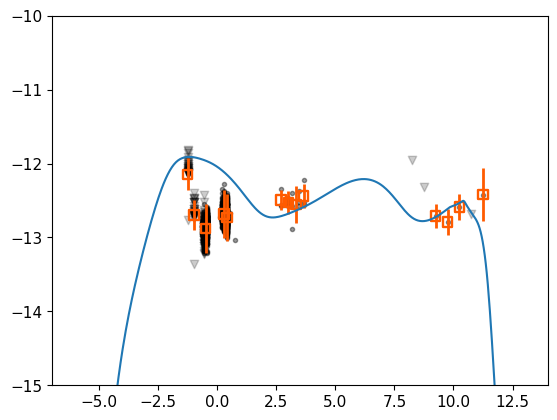

19.82610210060106


In [38]:
def bin_data(data_x, data_y, data_err, is_uplim, eps=0.4):
    
    x = np.log10(data_x[~is_uplim])
    bins = np.arange(np.min(x) - eps/2, np.max(x) + eps, eps)
    dig = np.digitize(x,bins)-1

    
    binned_x = np.array([np.mean(np.log10(data_x[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                         for i in set(dig)])
    binned_y = np.array([np.mean(np.log10(data_y[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                         for i in set(dig)])
    binned_e = np.log10(np.array([np.max(((data_err[~is_uplim]+data_y[~is_uplim])/data_y[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                                  for i in set(dig)]))
    binned_spread = np.array([np.ptp(np.log10(data_y[~is_uplim])[(x >= bins[i]) * (x < bins[i] + eps)]) 
                              for i in set(dig)])
    binned_spread *=0.5
    binned_spread = np.maximum(np.full(binned_spread.size,0.1), binned_spread)
    binned_err = np.maximum(binned_spread,binned_e)

    errrange = is_uplim * (data_x < 1e-3)
    binned_x = np.concatenate([binned_x,np.log10(data_x[errrange])])
    binned_y = np.concatenate([binned_y,np.log10(data_y[errrange])])
    binned_err = np.concatenate([binned_err,np.log10((data_err[errrange]+data_y[errrange])/data_y[errrange])])
    
    binned_isuplim = np.full(binned_err.size, False)
    binned_isuplim[binned_e.size:] += True
    
    srt = np.argsort(binned_x[np.isfinite(binned_x)])
    return binned_x[srt], binned_y[srt], binned_err[srt], binned_isuplim[srt]
    
def calc_chi2(xdata, ydata, yerrs, isuplim, xmod, ymod, npars=0,verb=0):
    """Calculate reduced chi2 values (lin and log) between data and model.
    """
    yerrs_nonzero = yerrs.copy()
    yerrs_nonzero[yerrs==0] = ydata[yerrs == 0] * .2
    
    yerrs_nonzero[yerrs<ydata*0.05] = ydata[yerrs<ydata*0.05] * .2
    
    yint = np.interp(xdata, 
                      xmod, 
                       ymod)
    roi = np.logical_not(isuplim * (yint <= ydata))
    chi2arr_lin = roi * (         ydata  -          yint ) ** 2 /          yerrs_nonzero  ** 2
    # chi2arr_log = roi * (np.log10(ydata) - np.log10(yint)) ** 2 / np.log10(yerrs_nonzero) ** 2
    chi2arr_lin[np.isinf(chi2arr_lin)] = 1e3
    # chi2arr_log[np.isinf(chi2arr_log)] = 1e3
    
    chi2arr_lin[np.isnan(chi2arr_lin)] = 1e3
    # chi2arr_log[np.isnan(chi2arr_log)] = 1e3

    chi2_lin = np.nansum(chi2arr_lin) / (np.sum(roi) - npars)
    # chi2_log = np.nansum(chi2arr_log) / (np.sum(roi) - npars)

    if verb and npars >= np.sum(roi):
        print("[calc_chi2]Warning: invalid chi2 test (#parameters >= #data points)")

    
    # ### DEBUG - PLOT
    # print(chi2arr_lin)
    # plt.plot(xmod, ymod)
    # plt.scatter(xdata[~isuplim], ydata[~isuplim],marker='.',color='k')
    # plt.scatter(xdata[isuplim], ydata[isuplim],marker='v',color='gray')
    # plt.axis([-7,15,-17,-9])
    # plt.show()
    # ###

    
    return chi2_lin



dxadd, dyadd, deadd =  data['freq. '][firran][data['flag'] == '  ']/ev_to_hz, data['flux '][firran][data['flag'] == '  '],data['err_flux '][firran][data['flag'] == '  '] 
sortadd  = np.argsort(np.concatenate([data_x, dxadd]))

# binned_x, binned_y, binned_err, binned_isuplim = bin_data(
#     np.concatenate([data_x, dxadd])[sortadd], 
# np.concatenate([data_y, dyadd])[sortadd], 
# np.concatenate([data_err, deadd])[sortadd], 
# np.concatenate([is_uplim, np.full(dxadd.size,0)])[sortadd])
binned_x, binned_y, binned_err, binned_isuplim = bin_data(
    data_x, 
data_y, 
data_err, 
is_uplim)
binned_isuplim[binned_x<np.log10(1e11/ev_to_hz)] = True

plt.scatter(np.log10(data_x[~is_uplim]),np.log10(data_y[~is_uplim]), marker='.',c='k',alpha=0.4)
plt.scatter(np.log10(data_x[is_uplim]),np.log10(data_y[is_uplim]), marker='v',c='k',alpha=0.2)


plt.scatter(binned_x[~binned_isuplim] , binned_y[~binned_isuplim],
            facecolors='none',s=45,marker='s',edgecolor=sns.xkcd_rgb['bright orange'],lw=1.7)
plt.errorbar(binned_x[~binned_isuplim], binned_y[~binned_isuplim], binned_err[~binned_isuplim], 
                ls='none',color=sns.xkcd_rgb['bright orange'],elinewidth=2.0)

plt.scatter(binned_x[binned_isuplim], binned_y[binned_isuplim], marker='v',s=50,color='green')


# plt.scatter(binned_x , binned_y,
            # facecolors='none',s=300,marker='o' ,edgecolor=sns.xkcd_rgb['purple'],lw=1.7)

plt.plot(np.log10(total_x), np.log10(total_y))
plt.axis([-7,14,-15,-10])
plt.show()

print(calc_chi2(binned_x, binned_y,  binned_err, binned_isuplim, 
                         np.log10(total_x), np.log10(total_y), npars=11,verb=1))




In [17]:
del xr        

In [ ]:
r_arr

(75, 75)

/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/2102988591.py:150: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integ = np.trapz(dens_dist_unnorm(np.logspace(np.log10(6e15),np.log10(R_BLR),100)), np.logspace(np.log10(6e15),np.log10(R_BLR),100))
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/3437289897.py:73: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in total_arrays])
/var/folders/25/d230kxr90hj414fnx8hg1f_4000956/T/ipykernel_12157/3437289897.py:74: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gamma_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=1e11)*(ta[0]>=1e8)], (ta[0])[(ta[0]<=1e11)*(ta[0]>=1e8)]) for 

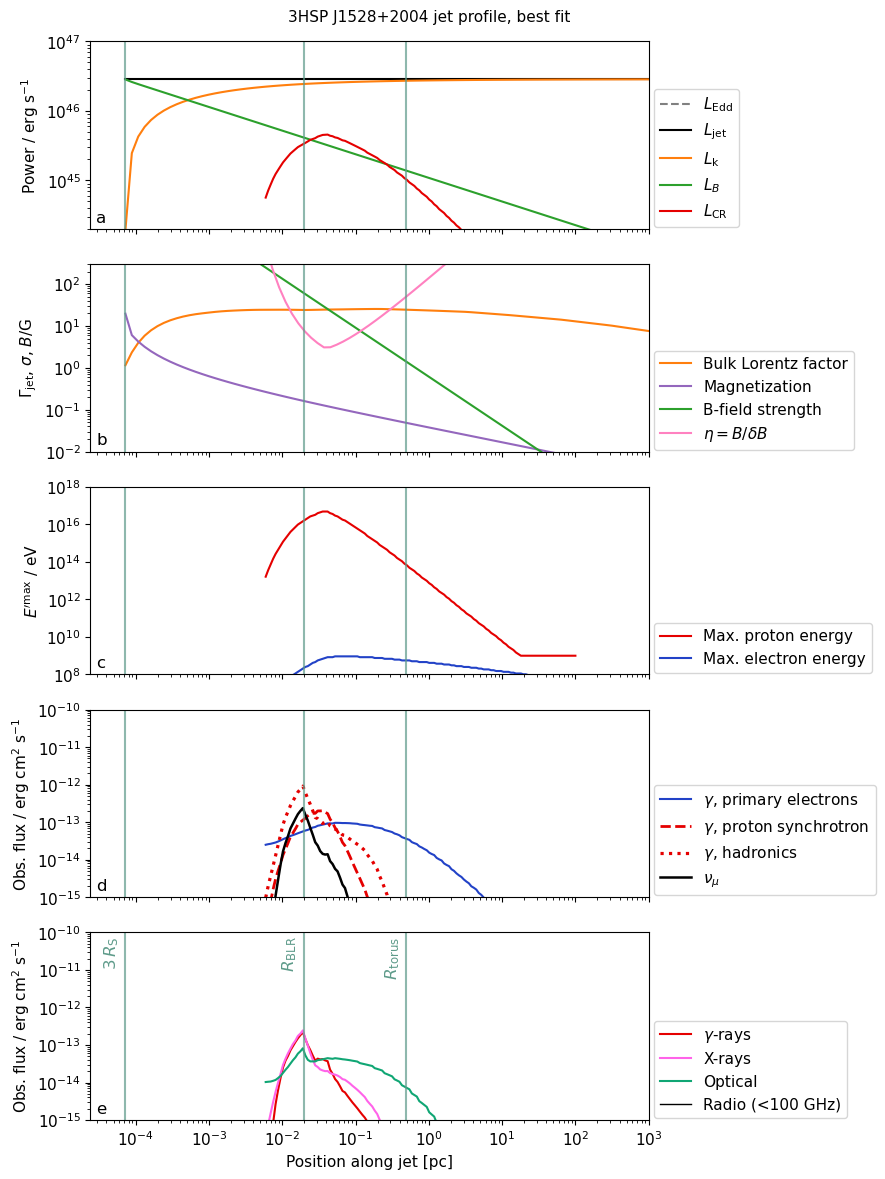

In [51]:
rarr2 = np.logspace(np.log10(3*schwarzschild(CAT[s]['M_BH'])),23,100) 
# rarr = np.logspace(np.log10(R_INIT), np.log10(RDR_ARR[-1] * R_BLR), 100)

lorarr = model_lor(rarr2)
magarr = model_magnetization(rarr2, lorarr)
barr = model_b(rarr2)
etarr = ETA_ACC(rarr2)
narr = model_n(rarr2,lorarr)
mperg = (const.m_p * const.c**2).to(u.erg).value

klarr = model_klum_bhf(rarr2, lorarr)
blarr = model_blum_bhf(rarr2, lorarr)


fig, axs = plt.subplots(5, 1, figsize=(9, 12), sharex=True)

plt.suptitle(f"3HSP J1528+2004 jet profile, best fit      ",y=0.98,fontsize=11)

ca = axs[0]
# Power
ca.hlines([eddington_lum(CAT[s]['M_BH'])], schwarzschild(CAT[s]['M_BH']), rarr2[-1], color='gray', ls='--', label=r'$L_\mathrm{Edd}$')
ca.loglog(rarr2 * u.cm.to(u.pc), blarr + klarr, c='k', label=r'$L_\mathrm{jet}$')
ca.loglog(rarr2 * u.cm.to(u.pc), klarr, label=r'$L_\mathrm{k}$', c='tab:orange')
ca.loglog(rarr2 * u.cm.to(u.pc), blarr, label=r'$L_B$', c='tab:green')
ca.loglog(r_arr, [ra['lor'] ** 2 * ra['crlum'] for ra in rate_arrays], c=sns.xkcd_rgb['red'], label=r'$L_\mathrm{CR}$')
ca.set_ylabel(r'Power / erg s$^{-1}$')
ca.legend(loc=(1.01,0.01))
ca.set_ylim([2e44,1e47])

# Lorentz factor
ca = axs[1]
ca.loglog(rarr2 * u.cm.to(u.pc), lorarr, c='tab:orange', label='Bulk Lorentz factor')
ca.loglog(rarr2 * u.cm.to(u.pc), magarr, c='tab:purple', label='Magnetization')
ca.loglog(rarr2 * u.cm.to(u.pc), barr, c='tab:green', label='B-field strength')
ca.loglog(rarr2 * u.cm.to(u.pc), etarr, c=sns.xkcd_rgb['pink'], label=r'$\eta=B/\delta B$')

ca.set_ylabel(r'$\Gamma_\mathrm{jet}$, $\sigma$, $B/\mathrm{G}$')
ca.legend(loc=(1.01,0.01))
ca.set_ylim([1e-2,300])


# ca = axs[2]
# radarr = model_rblob(rarr2, lorarr)
# # Power
# ca.loglog(rarr2, radarr, c=sns.xkcd_rgb['magenta'], label=r'$R^\prime_\mathrm{jet}$')
# ca.set_ylabel(r'$R^\prime_\mathrm{j}$ / cm')
# ca.legend(loc=(1.01,0.01))
# # ca.set_ylim([1e13,1e18])



ca = axs[2]
# Maximum energy
ca.loglog(r_arr, [ra['emax_p'] for ra in rate_arrays], c=sns.xkcd_rgb['red'], label=r'Max. proton energy')
ca.loglog(r_arr, [ra['emax_e'] for ra in rate_arrays], c=sns.xkcd_rgb['blue blue'], label=r'Max. electron energy')
ca.set_ylabel(r'$E^{\prime\mathrm{max}}$ / eV')
ca.legend(loc=(1.01,0.01))
ca.set_ylim([1e8,1e18])

# Luminosity distribution
ca = axs[3]
ca.loglog(r_arr, elum_arr, c=sns.xkcd_rgb['blue blue'], label=r'$\gamma$, primary electrons')
# ca.loglog(r_arr, plum_arr, c='tab:red', label='Protons')
ca.loglog(r_arr, pslum_arr, c=sns.xkcd_rgb['red'], ls='--',lw=2, label=r'$\gamma$, proton synchrotron')
ca.loglog(r_arr, pplum_arr+bhlum_arr+bhlum_arr, c=sns.xkcd_rgb['red'],lw=2.3,ls=':', label=r'$\gamma$, hadronics')
ca.loglog(r_arr, nulum_arr, c='k',lw=1.8,ls='-', label=r'$\nu_\mu$')
ca.set_ylabel('Obs. flux / erg cm$^2$ s$^{-1}$')
# ca.set_xlabel('Position along jet [pc]')
ca.legend(loc=(1.01,0.01))
ca.set_ylim([1e-15,1e-10])


lum_arr = np.array([np.trapz(ta[1] /  ta[0], ta[0]) for ta in total_arrays])
gamma_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=1e11)*(ta[0]>=1e8)], (ta[0])[(ta[0]<=1e11)*(ta[0]>=1e8)]) for ta in total_arrays])
x_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=100e3)*(ta[0]>=100)], (ta[0])[(ta[0]<=100e3)*(ta[0]>=100)]) for ta in total_arrays])
optical_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]*ev_to_hz<=(1e16))*(ta[0]*ev_to_hz>=1e14)], (ta[0])[(ta[0]*ev_to_hz<=(1e16))*(ta[0]*ev_to_hz>=1e14)]) for ta in total_arrays])
radio_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]<=1e-1)], (ta[0])[(ta[0]<=1e-1)]) for ta in total_arrays])
tenghz_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]*ev_to_hz<=10e9)], (ta[0])[(ta[0]*ev_to_hz<=10e9)]) for ta in total_arrays])
hunghz_arr = np.array([np.trapz((ta[1] * ta[2] /  ta[0])[(ta[0]*ev_to_hz<=300e9)], (ta[0])[(ta[0]*ev_to_hz<=300e9)]) for ta in total_arrays])


# Energy distribution
ca = axs[4]
ca.loglog(r_arr, gamma_arr, c=sns.xkcd_rgb['red'], lw=1.5,label=r'$\gamma$-rays')
ca.loglog(r_arr, x_arr, c=sns.xkcd_rgb['candy pink'], lw=1.5,label=r'X-rays')
ca.loglog(r_arr, optical_arr, c=sns.xkcd_rgb['bluish green'],lw=1.5, label='Optical')
ca.loglog(r_arr, hunghz_arr, c='k',lw=1.0, label='Radio (<100 GHz)')
ca.set_ylabel('Obs. flux / erg cm$^2$ s$^{-1}$')
ca.set_xlabel('Position along jet [pc]')
ca.legend(loc=(1.01,0.01))
ca.set_ylim([1e-15,1e-10])

ca.text(0.86 * 3*schwarzschild(CAT[s]['M_BH']) * u.cm.to(u.pc),8e-11, r"$3\,R_\mathrm{S}$",rotation=90, verticalalignment='top', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)
ca.text(0.86 * R_BLR * u.cm.to(u.pc),8e-11, r"$R_\mathrm{BLR}$",rotation=90, verticalalignment='top', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)
ca.text(0.86 * R_TORUS * u.cm.to(u.pc),8e-11, r"$R_\mathrm{torus}$",rotation=90, verticalalignment='top', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)

for ca, label in zip(axs, ['a', 'b', 'c', 'd', 'e']):
    ca.vlines([3*schwarzschild(CAT[s]['M_BH'])*u.cm.to(u.pc), R_BLR*u.cm.to(u.pc), R_TORUS*u.cm.to(u.pc)],1e-100,1e100,color=sns.xkcd_rgb['grey teal'],alpha=0.7)
    # ca.fill_between([1e-10,R_BLR*u.cm.to(u.pc)],[1e-100,1e-100], [1e100,1e100],color=sns.xkcd_rgb['grey teal'],alpha=0.05)
    # ca.fill_between([schwarzschild(CAT[s]['M_BH'])*u.cm.to(u.pc),3*schwarzschild(CAT[s]['M_BH'])*u.cm.to(u.pc)],[1e-100,1e-100], [1e100,1e100],color=sns.xkcd_rgb['grey teal'],alpha=0.15)
    ca.text(0.01, 0.02, label, transform=ca.transAxes, fontsize=12, verticalalignment='bottom')



plt.xlim([schwarzschild(CAT[s]['M_BH'])*u.cm.to(u.pc), 1e3])

plt.subplots_adjust(hspace=0.1)
# Adjust layout
plt.tight_layout()

plt.savefig(f'plots/parameter_evolution_{s}.png', dpi=300)
plt.show()


In [52]:
np.savez("plotdata_3HSP1528.npz",
    rarr2=rarr2,                        # cm
    lorarr=lorarr,
    magarr=magarr,
    barr=barr,
    etarr=etarr,
    klarr=klarr,
    blarr=blarr,
    r_arr=r_arr,                        # cm
    lcr_arr=[ra['lor']**2 * ra['crlum'] for ra in rate_arrays],
    emax_p=[ra['emax_p'] for ra in rate_arrays],
    emax_e=[ra['emax_e'] for ra in rate_arrays],
    elum_arr=elum_arr,
    pslum_arr=pslum_arr,
    pplum_arr=pplum_arr,
    bhlum_arr=bhlum_arr,
    nulum_arr=nulum_arr,
    gamma_arr=gamma_arr,
    x_arr=x_arr,
    optical_arr=optical_arr,
    hunghz_arr=hunghz_arr,
    M_BH=CAT[s]['M_BH'],               # float in Msun
    R_BLR=R_BLR,                       # cm
    R_TORUS=R_TORUS                    # cm
)


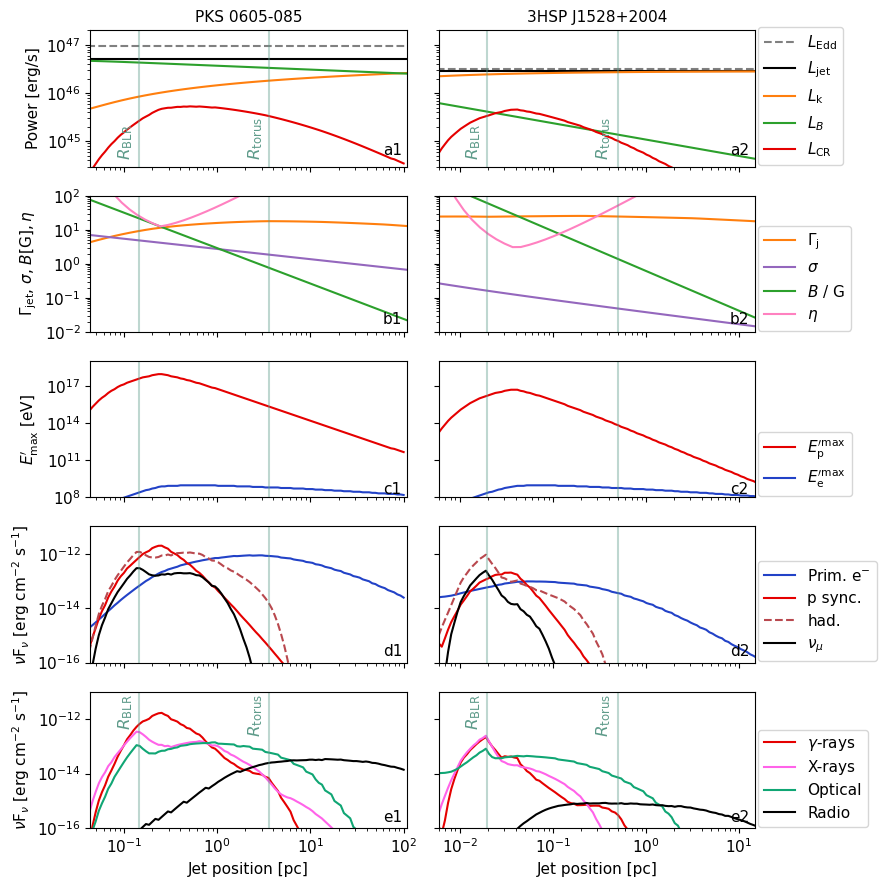

In [66]:
# constants
pc_in_cm = 3.085677581e18
G = 6.67430e-8         # cm^3 g^-1 s^-2
c = 2.99792458e10      # cm/s
M_sun = 1.98847e33     # g

rblr_pks = 4.4668359215096166e+17 * u.cm.to(u.pc)
rblr_hsp = 6.117091735700553e+16 * u.cm.to(u.pc)

rtor_pks = 1.1167089803774042e+19 * u.cm.to(u.pc)
rtor_hsp = 1.5292729339251382e+18 * u.cm.to(u.pc)

rblrs = [rblr_pks, rblr_hsp]
rtors = [rtor_pks, rtor_hsp]


def eddington_lum(mbh_msun):
    return 1.26e38 * mbh_msun

def safe_loglog(ax, x, y, *args, **kwargs):
    mask = np.isfinite(x) & np.isfinite(y) & (x > 0) & (y > 0)
    if np.any(mask):
        ax.loglog(x[mask], y[mask], *args, **kwargs)

def safe_vlines(ax, xvals, ymin, ymax, *args, **kwargs):
    clean = [float(x) for x in xvals if np.isfinite(x) and x > 0]
    if clean:
        ax.vlines(clean, ymin, ymax, *args, **kwargs)

label1 = 'PKS 0605-085'
label2 = '3HSP J1528+2004'
# Load data
data1 = np.load("plotdata_PKS0605.npz", allow_pickle=True)
data2 = np.load("plotdata_3HSP1528.npz", allow_pickle=True)

pc_in_cm = 3.085677581e18


fig, axs = plt.subplots(5, 2, figsize=(9, 9), sharex='col', sharey='row')

for i, (data, rblr, rtor) in enumerate(zip([data1, data2],rblrs, rtors)):
    r_pc = data['rarr2'] / pc_in_cm
    r_arr = data['r_arr']
    M_BH = data['M_BH']
    R_BLR = rblr#data['R_BLR'] / pc_in_cm
    R_TORUS = rtor #data['R_TORUS'] / pc_in_cm
    RS = schwarzschild(M_BH) / pc_in_cm

    # Panel a: Power
    axs[0, i].hlines(eddington_lum(M_BH), RS, r_pc[-1], color='gray', ls='--', label=r'$L_\mathrm{Edd}$')
    axs[0, i].loglog(r_pc, data['blarr'] + data['klarr'], c='k', label=r'$L_\mathrm{jet}$')
    axs[0, i].loglog(r_pc, data['klarr'], c='tab:orange', label=r'$L_\mathrm{k}$')
    axs[0, i].loglog(r_pc, data['blarr'], c='tab:green', label=r'$L_B$')
    axs[0, i].loglog(r_arr, data['lcr_arr'], c=sns.xkcd_rgb['red'], label=r'$L_\mathrm{CR}$')
    
    axs[0, i].set_title([label1, label2][i])
    axs[0, i].text(0.9 * rblr, 4e44, r"$R_\mathrm{BLR}$",rotation=90, verticalalignment='bottom', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)
    axs[0, i].text(0.9 * rtor, 4e44, r"$R_\mathrm{torus}$",rotation=90, verticalalignment='bottom', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)

    # Panel b: Jet dynamics
    axs[1, i].loglog(r_pc, data['lorarr'], c='tab:orange', label=r'$\Gamma_\mathrm{j}$')
    axs[1, i].loglog(r_pc, data['magarr'], c='tab:purple', label=r'$\sigma$')
    axs[1, i].loglog(r_pc, data['barr'], c='tab:green', label=r'$B$ / G')
    axs[1, i].loglog(r_pc, data['etarr'], c=sns.xkcd_rgb['pink'], label=r'$\eta$')

    # Panel c: Max energy
    axs[2, i].loglog(r_arr, data['emax_p'], c=sns.xkcd_rgb['red'], label=r'$E_\mathrm{p}^{\prime\mathrm{max}}$')
    axs[2, i].loglog(r_arr, data['emax_e'], c=sns.xkcd_rgb['blue blue'], label=r'$E_\mathrm{e}^{\prime\mathrm{max}}$')

    # Panel d: Luminosities
    axs[3, i].loglog(r_arr, data['elum_arr'], c=sns.xkcd_rgb['blue blue'], label=r'Prim. e$^{-}$')
    axs[3, i].loglog(r_arr, data['pslum_arr'], c=sns.xkcd_rgb['red'], ls='-', label=r'p sync.')
    axs[3, i].loglog(r_arr, data['pplum_arr'] + 2 * data['bhlum_arr'], c=sns.xkcd_rgb['dusty red'], ls='--', label='had.')
    axs[3, i].loglog(r_arr, data['nulum_arr'], c='k', lw=1.5, label=r'$\nu_\mu$')

    # Panel e: Energy bands
    axs[4, i].loglog(r_arr, data['gamma_arr'], c=sns.xkcd_rgb['red'], label=r'$\gamma$-rays')
    axs[4, i].loglog(r_arr, data['x_arr'], c=sns.xkcd_rgb['candy pink'], label='X-rays')
    axs[4, i].loglog(r_arr, data['optical_arr'], c=sns.xkcd_rgb['bluish green'], label='Optical')
    axs[4, i].loglog(r_arr, data['hunghz_arr'], c='k', label='Radio')
    axs[4, i].set_xlabel('Jet position [pc]')
    axs[4, i].text(0.9 * rblr, 8e-12, r"$R_\mathrm{BLR}$",rotation=90, verticalalignment='top', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)
    axs[4, i].text(0.9 * rtor, 8e-12, r"$R_\mathrm{torus}$",rotation=90, verticalalignment='top', horizontalalignment='right',color=sns.xkcd_rgb['grey teal'],fontsize=12)

    # Reference lines
    for ax in axs[:, i]:
        ax.vlines([3 * RS, rblr, rtor], 1e-20, 1e50, color=sns.xkcd_rgb['grey teal'], alpha=0.4)

    for ax in axs[:, i]:
        ax.set_xlim(0.3 * rblr, 30 * rtor)

axs[0, 0].set_ylabel('Power [erg/s]')
axs[1, 0].set_ylabel(r'$\Gamma_\mathrm{jet}$, $\sigma$, $B [\mathrm{G}], \eta$')
axs[2, 0].set_ylabel(r'$E^\prime_\mathrm{max}$ [eV]')
axs[3, 0].set_ylabel(r'$\nu$F$_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]')
axs[4, 0].set_ylabel(r'$\nu$F$_{\nu}$ [erg cm$^{-2}$ s$^{-1}$]')

for ax in axs[:,1]:
    ax.legend(loc=(1.01,0.01))



for ax in axs[0,:]:
    ax.set_ylim(3e44, 2e47)

for ax in axs[1,:]:
    ax.set_ylim(1e-2, 1e2)

for ax in axs[2,:]:
    ax.set_ylim(1e8, 1e19)

for ax in axs[3,:]:
    ax.set_ylim(1e-16, 1e-11)

for ax in axs[4,:]:
    ax.set_ylim(1e-16, 1e-11)

for i, letter in enumerate(['a', 'b', 'c', 'd', 'e']):
    axs[i,0].text(6e1, axs[i,0].get_ylim()[0]*1.7,letter+"1")
    axs[i,1].text(8e0, axs[i,1].get_ylim()[0]*1.7,letter+"2")


plt.subplots_adjust(hspace=0.05, top=0.93)
plt.tight_layout()
# plt.suptitle("Jet Structure Comparison", fontsize=15, y=0.99)
plt.savefig("plots/jet_evolution_PKS0605_vs_3HSP1528.png", dpi=300)
plt.show()

